# **Importing the necessary libraries**


In [1]:
# Imorting the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import  filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,LeaveOneOut,KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score
from sklearn.metrics import  f1_score,precision_recall_curve,cohen_kappa_score,auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import  XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = None
pd.options.display.precision = 3
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Dataset Description

| Column Name             | Description                                      |
| ----------------------- | ------------------------------------------------ |
| `student_id`            | Unique identifier                                |
| `age`                   | Age of the student                               |
| `gender`                | Male / Female / Other                            |
| `course_type`           | Digital Marketing / Python / UI/UX               |
| `session_count`         | Total number of sessions attended                |
| `avg_session_duration`  | Average time (in minutes) spent per session      |
| `quiz_attempts`         | Number of quiz attempts made                     |
| `assignments_submitted` | Number of assignments submitted                  |
| `satisfaction_rating`   | 1 to 5 scale rating from course feedback         |
| `dropout`               | Target variable – 1 = Dropped Out, 0 = Completed |


# **Read the Dataset**


In [2]:
# Reading the dataset using pandas library
learning_data = pd.read_excel('learning_data.xlsx')

# **Print first five rows**


In [3]:
learning_data.head()

,student_id,age,gender,course_type,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
0,S0001,24,Male,UI/UX,11,108.13,7,5,5,0
1,S0002,37,Male,Python,9,59.51,3,1,1,1
2,S0003,32,Male,UI/UX,15,81.77,3,3,1,1
3,S0004,28,Female,Digital Marketing,7,24.82,4,4,1,1
4,S0005,25,Female,Digital Marketing,5,27.11,7,1,4,1


# **Shape of the data**


In [4]:
print(f'No of rows: {learning_data.shape[0]}')
print(f'No of columns: {learning_data.shape[1]}')

No of rows: 200
No of columns: 10


# **Checking data types of columns**


In [5]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             200 non-null    object 
 1   age                    200 non-null    int64  
 2   gender                 200 non-null    object 
 3   course_type            200 non-null    object 
 4   session_count          200 non-null    int64  
 5   avg_session_duration   200 non-null    float64
 6   quiz_attempts          200 non-null    int64  
 7   assignments_submitted  200 non-null    int64  
 8   satisfaction_rating    200 non-null    int64  
 9   dropout                200 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


**Inference:**

- Only gender and course_type columns are categorical. The rest are numerical.


# **Making student id as index as it is a redundant column**


In [6]:
learning_data.set_index('student_id', inplace=True)

# **Description of the data**


In [7]:
learning_data.describe()

,age,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,27.850,14.415,59.160,4.320,2.380,3.090,0.485
std,6.422,8.899,31.797,2.865,1.721,1.411,0.501
min,18.000,0.000,7.310,0.000,0.000,1.000,0.000
25%,22.000,6.750,30.850,2.000,1.000,2.000,0.000
50%,27.500,15.000,58.160,4.000,2.000,3.000,0.000
75%,33.000,22.000,87.230,7.000,4.000,4.000,1.000
max,39.000,29.000,118.850,9.000,5.000,5.000,1.000


**Inference -**
As we can see from the following description that:

- Max age of a learner is 39 years old and minimum age is 18 years old.
- The average age of learners is 27.85 years old.
- The aveage maximum duration of session is 118.85.
- Max session count is 29.
- Maximum quiz attempts are 9 and minimum is 0.


In [8]:
# Describing the categorical data
learning_data.describe(include=object)

,gender,course_type
count,200,200
unique,3,3
top,Male,Digital Marketing
freq,94,83


**Inference -**
as we can the description of category columns that:

- Maximum number of learners are `male`.
- Maximum number of learners enrolled in `Digital Marketing` course.


# **Data Cleaning and Preprocessing**


#### **Checking for missing values**


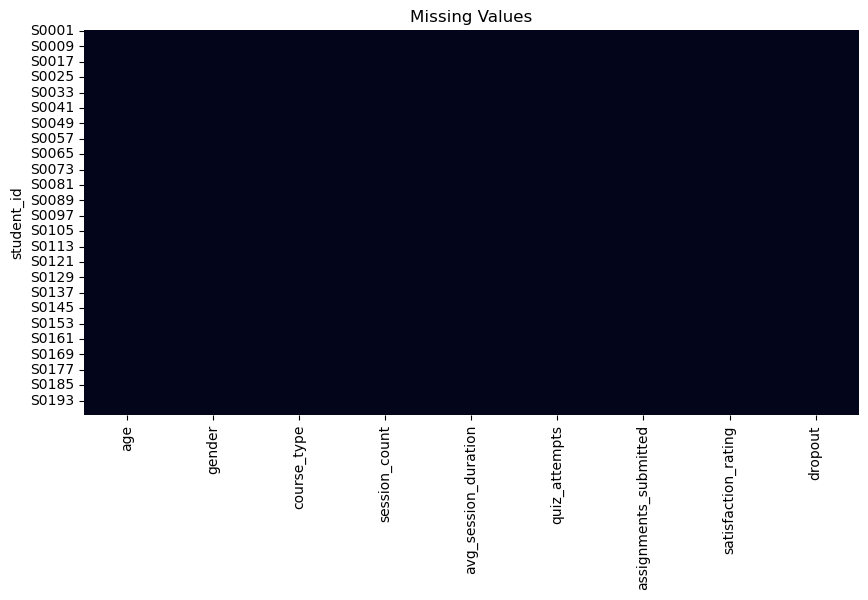

In [9]:
# If there are any missing value we will see white lines in the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(learning_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

In [10]:
# isnull().sum() will return the number of null values in each column
learning_data.isnull().sum()

age                      0
gender                   0
course_type              0
session_count            0
avg_session_duration     0
quiz_attempts            0
assignments_submitted    0
satisfaction_rating      0
dropout                  0
dtype: int64

**Inference:**

- There are no missing values in the dataset.


#### **Checking for duplicates**


In [11]:
learning_data[learning_data.duplicated()]

,age,gender,course_type,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
student_id,,,,,,,,,


**Inference:**

- There are no duplicates in the dataset.


#### **Checking for outliers**


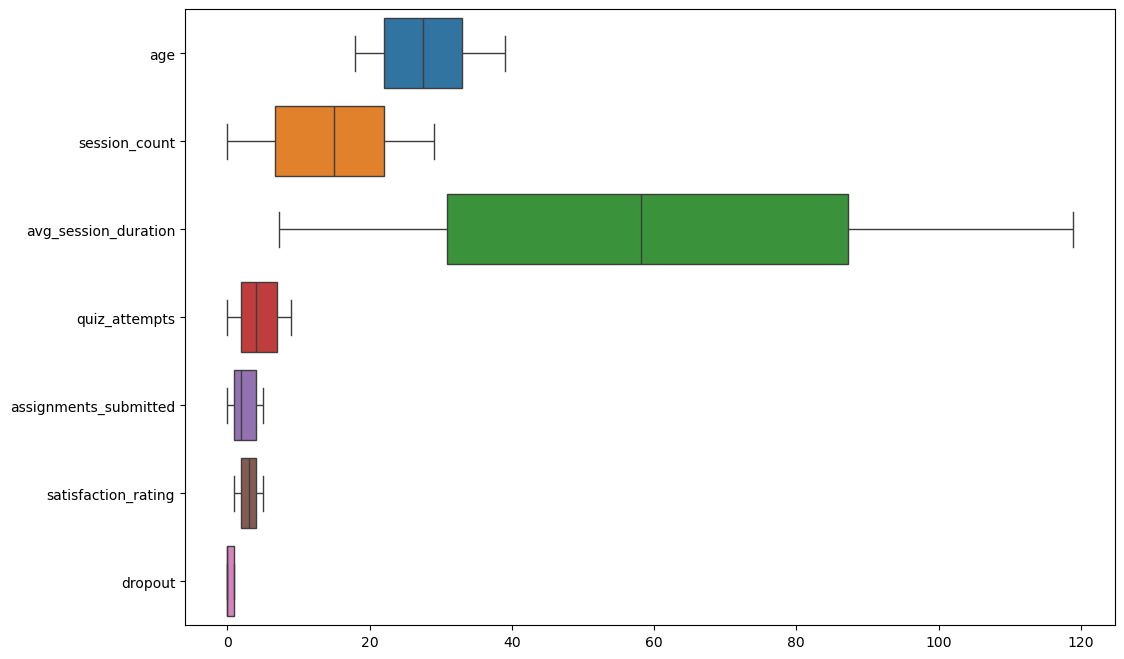

In [12]:
# Boxplot for the numerical data
# If there are any outliers in the data, they would be represented as points outside the whiskers of the boxplot.
plt.figure(figsize=(12,8))
sns.boxplot(data=learning_data,orient='h')
plt.show()

**Inference:**

- There are no outliers in the dataset.


# **Data Visualization**


#### **Univariate Analysis**


**Categorical variable**


In [13]:
cat_cols = learning_data.select_dtypes(include='object')

**Pie Chart**


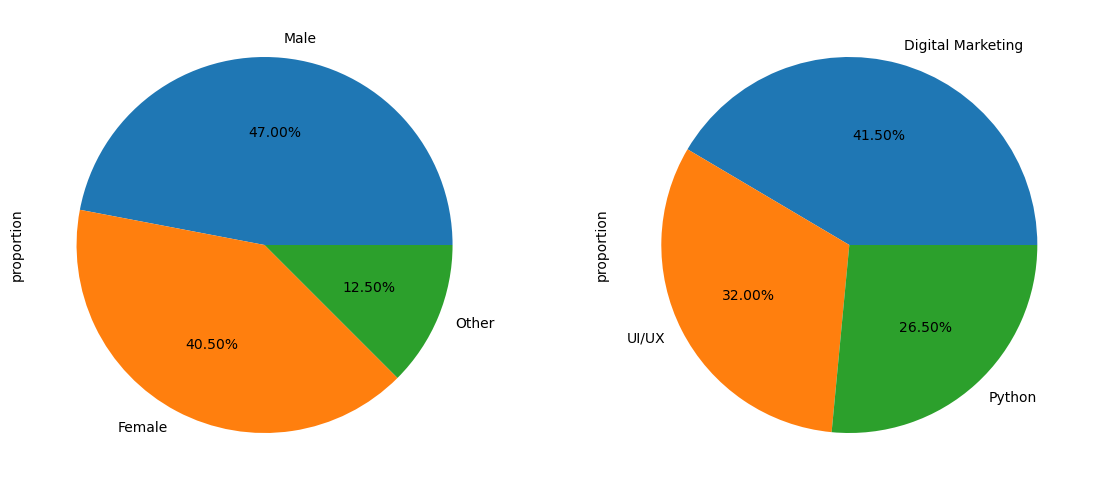

In [14]:
t = 1
for i in cat_cols:
    plt.subplot(1,2,t)
    learning_data[i].value_counts(normalize=True).plot(kind='pie', figsize=(12, 5),autopct='%.2f%%')
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**

- Maximum number of learner are `male` i.e `47%` and 40.5% female and rest others.

- Most of the learner enrolled in `Digital Marketing course` i.e `41.5%` and 32% in UI/UX and rest in Python.


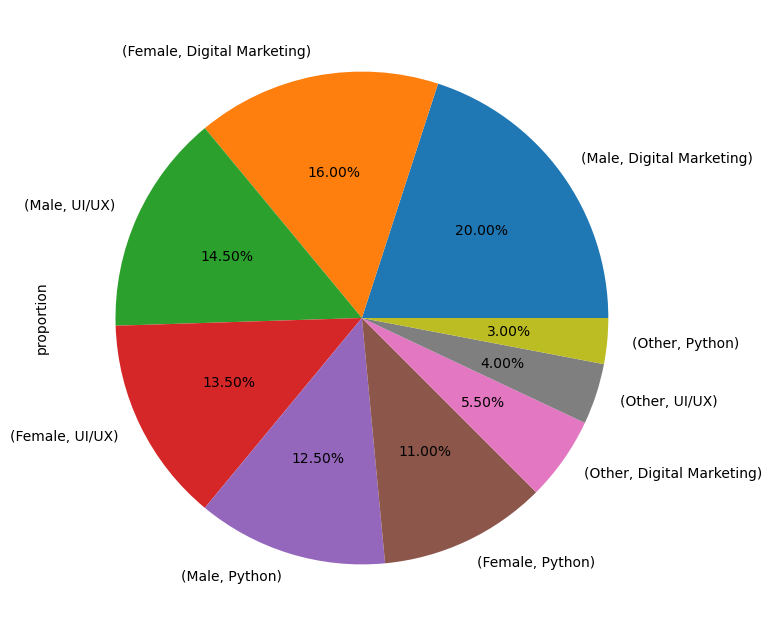

In [15]:
cat_cols.value_counts(normalize=True).plot(kind='pie', figsize=(15, 8),autopct='%.2f%%')
plt.show()

**Inference:**

- `Male - Digital Marketing` holds the largest share at 20%, followed by `Female - Digital Marketing` at 16%.

- `UI/UX` course has a relatively balanced participation from both genders `(Male: 14.5%, Female: 13.5%)`.

- `Python` course has lower overall representation, with `Male (12.5%) and Female (11%)`.

- Students identifying as `"Other" gender` make up a smaller portion, with their highest representation in `Digital Marketing (5.5%)`.

- The least represented group is `Other, Python with just 3%`.


**Countplot**


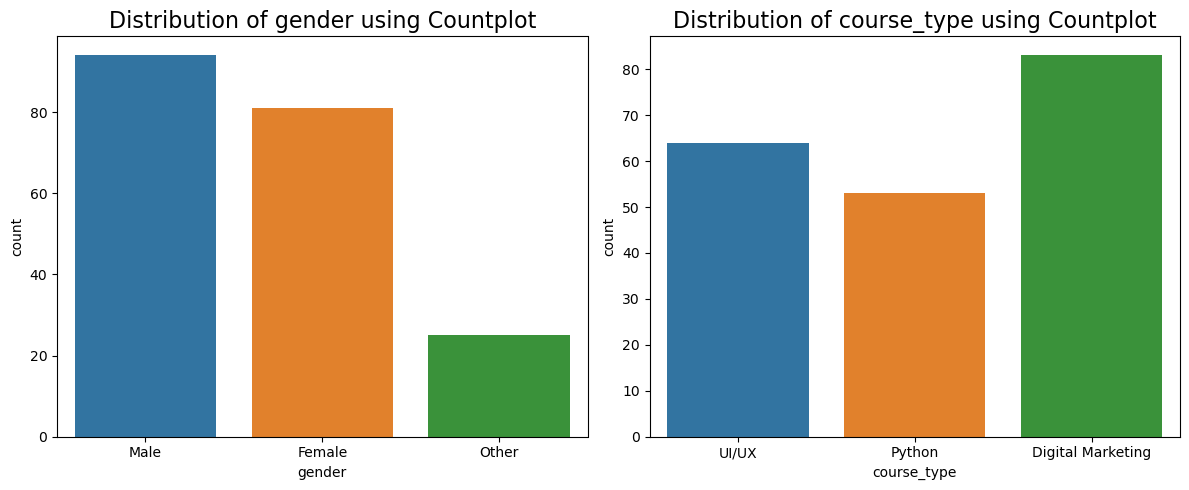

In [16]:
t = 1
plt.figure(figsize=(12, 5))
for i in cat_cols:
    plt.subplot(1,2,t)
    sns.countplot(data=learning_data,x = i,hue=i)
    plt.title(f'Distribution of {i} using Countplot', fontsize = 16)
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**

- `80+` learners are `male`, `~80` learners are `female` and `~30` are `other gender` learners.

- `80+` learners enrolled in `Digital Marketing` course, `~65` learners enrolled in `UI/UX` course and `~50` learners enrolled in `Python` course.


**Numerical variables**


In [17]:
num_cols = learning_data.select_dtypes(include=np.number)

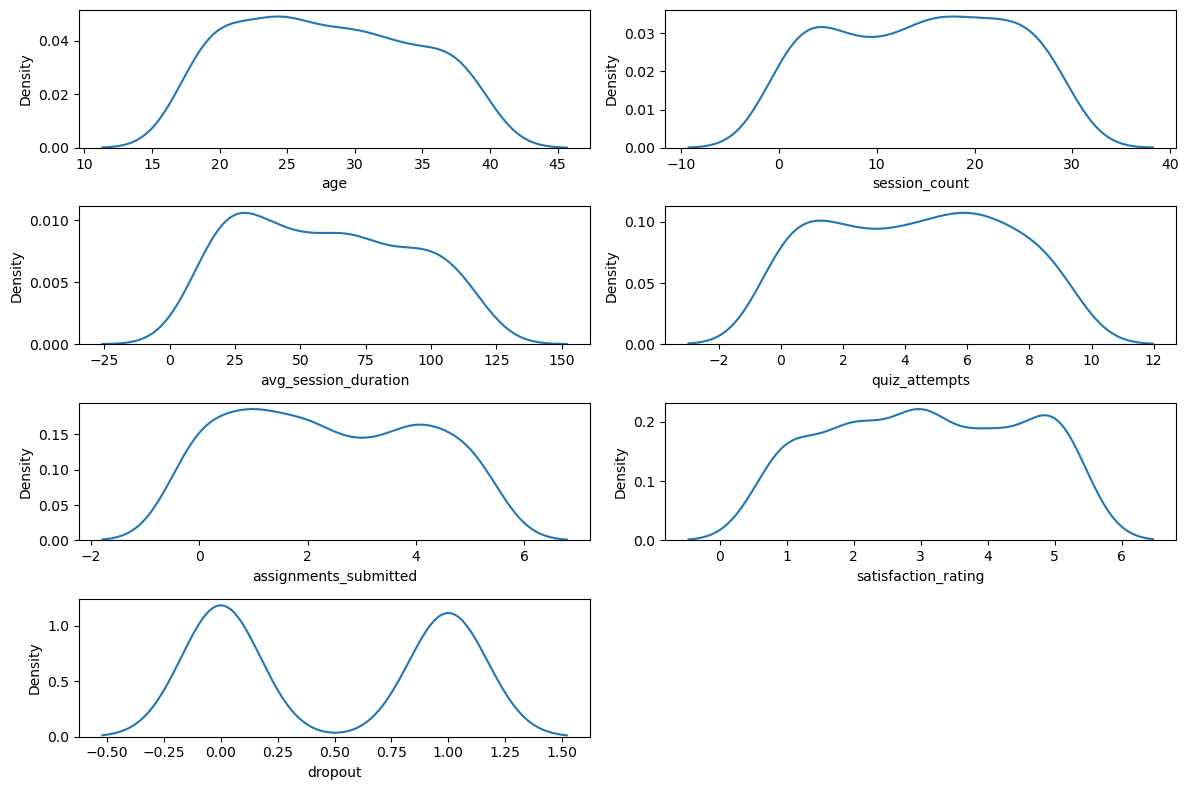

In [18]:
t=1
plt.figure(figsize=(12, 8))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data=learning_data,x=i)
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**

- `Age` is `most concentrated between 18 to 35 years`, indicating the typical student demographic.

- Session Count, Quiz Attempts, and Assignments Submitted are bimodal, possibly indicating two distinct engagement groups: low vs high participation.

- `Average Session` Duration `peaks around 40 to 80 minutes`, suggesting common attention spans.

- `Satisfaction Rating` is `relatively uniform between 2 to 5`, with slight dips at extremes—most students rated moderately.

- `Dropout` shows a clear `bimodal distribution`, indicating a `near-equal split between students who completed vs dropped out`.


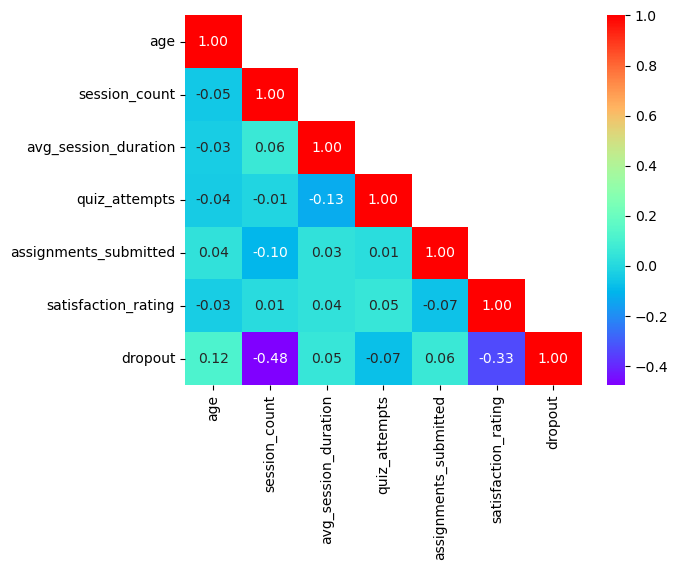

In [19]:
sns.heatmap(num_cols.corr(), annot=True,cmap='rainbow', fmt='.2f',mask=np.triu(num_cols.corr(),k=1))
plt.show()

**Inference:**

- `Session_count` and `satisfaction_rating` have a slightly neagtive correlation with `target variable dropout` indicating that as the session count and satisfaction rating increase, the dropout rate decreases. However, the correlation is weak

- Other features does not have any neither positive nor negative correlation with `target variable dropout` indicating that they do not have any significant impact on the `target variable dropout`.


#### **Bivariate Analysis**


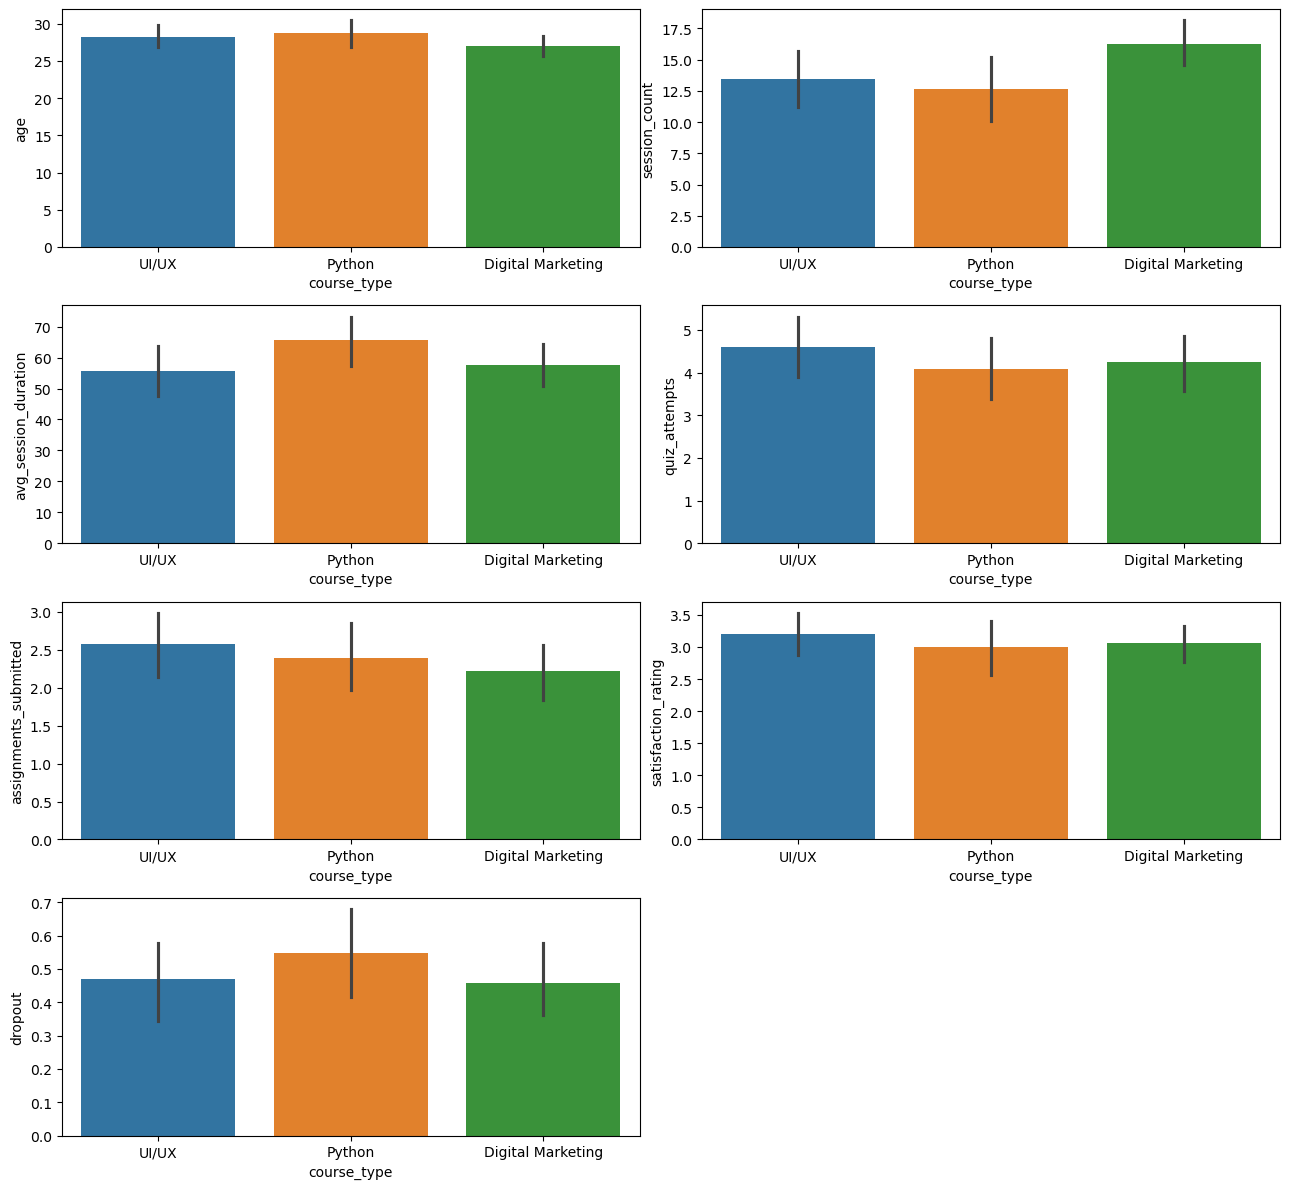

In [20]:
t = 1
plt.figure(figsize=(13, 12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.barplot(data=learning_data,x=learning_data['course_type'],y=i,hue=learning_data['course_type'])
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**

- As we can see age of learners is `~25` around all the courses.

- `Maximum` session count was done in `Digital marketing` course with `~17` sessions and `minimum` with `Python` course with `~12` sessions.

- `Average session duration` of `Python` course was `maximum` and `Digital Marketing and UI/UX` course was `approximately same`.

- `Maximum` quiz attempts were done for `UI/UX` course with `~4`.

- Maximum `assignment submission` and `satisfaction rating` was done in `UI/UX` course.

- Maximum `dropout` were in `Python` course `followed` by UI/UX and Digital Marketing course.


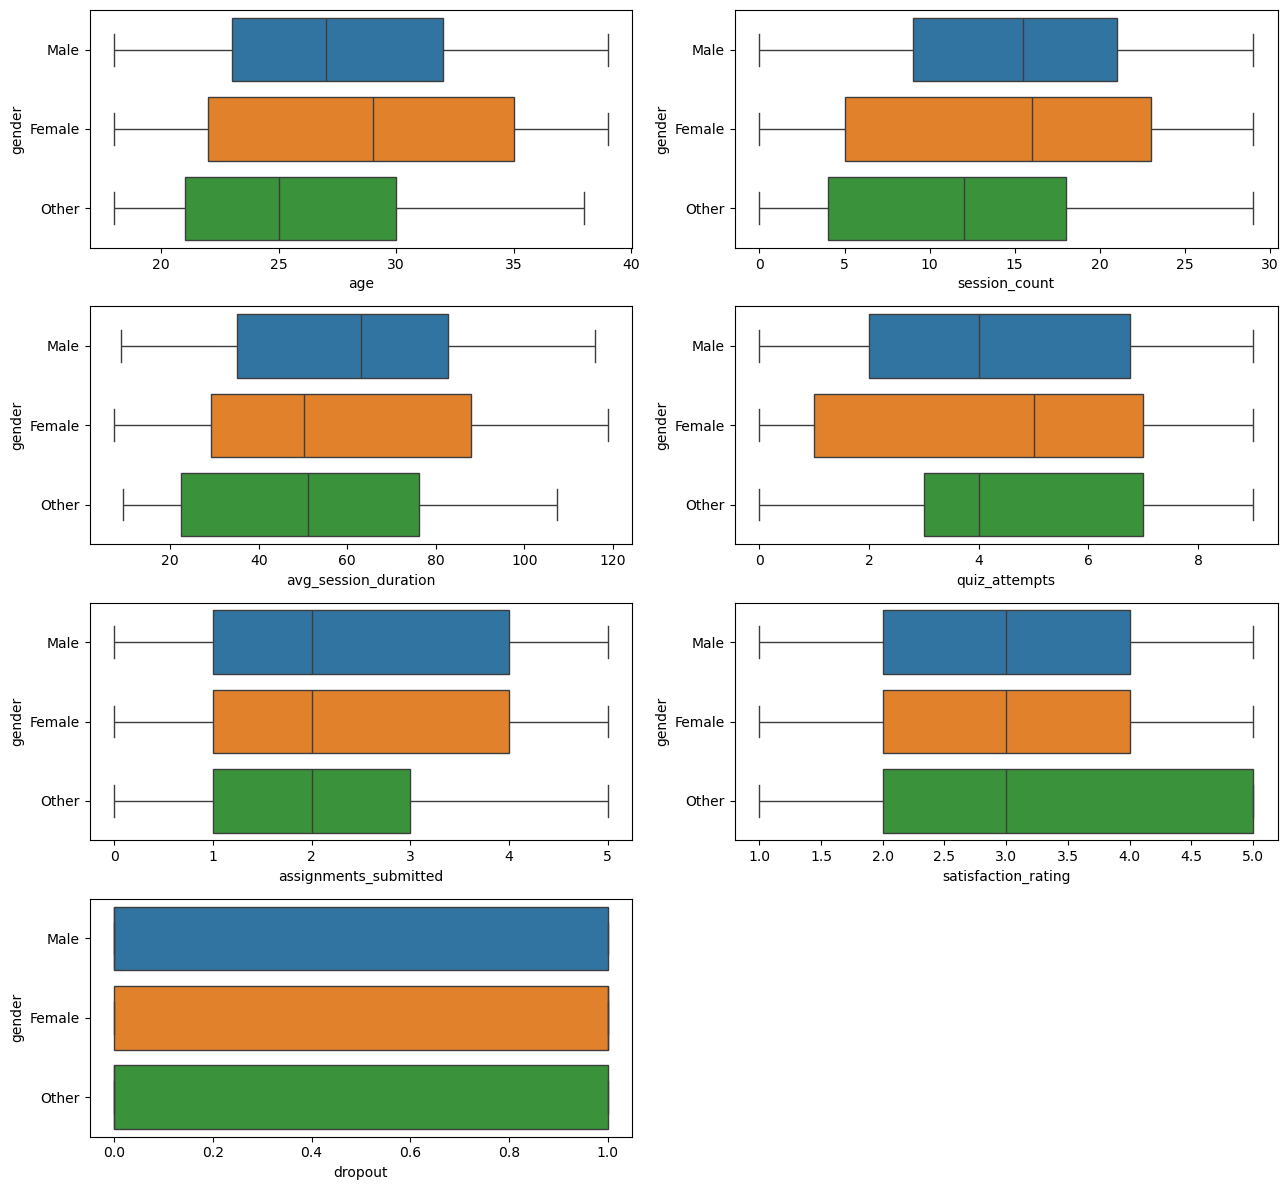

In [21]:
t = 1
plt.figure(figsize=(13, 12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=learning_data,x=i,y=learning_data['gender'],hue=learning_data['gender'])
    t=t+1
plt.tight_layout()
plt.show()

**Inference:**

- `Female students` generally show higher engagement across most metrics `(sessions, quizzes, assignments)`.

- `"Other" gender` group shows slightly `lower participation` but `higher satisfaction ratings`.

- `Dropout` rates appear `similar` across `all genders`.


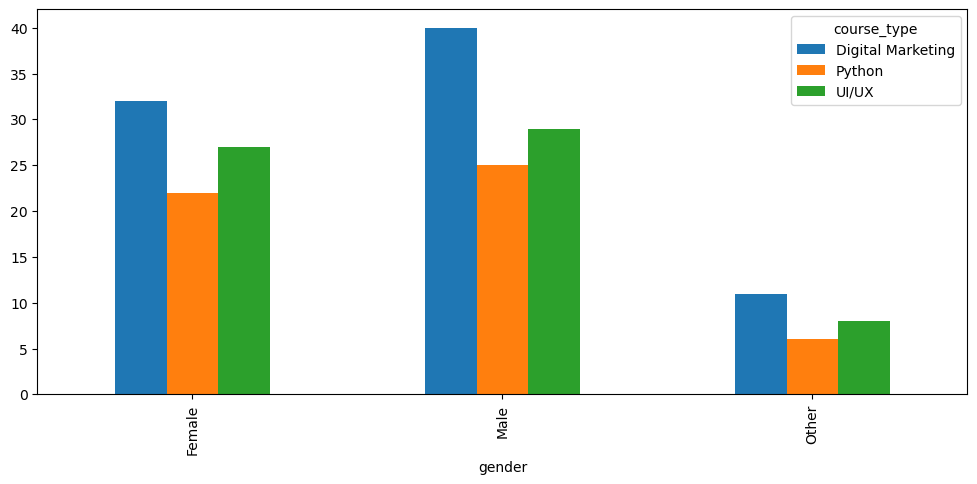

In [22]:
pd.crosstab(index=learning_data['gender'],columns=learning_data['course_type']).plot(kind='bar', figsize=(12, 5))
plt.show()

**Inference:**

- Across all genders `maximum` learners are enrolled in `Digital Marketing` course and `minimum` for `Python` course.


# **Encoding of categorical variables for machine learning model**


**Ordinal encoding of `gender` and `course type`**


In [23]:
gender_dict = {'Female':0,'Male':1,'Other':2}

In [24]:
learning_data['gender'] = learning_data['gender'].map(gender_dict)

In [25]:
coursetype_dict = {'Digital Marketing':0,'UI/UX':1,'Python':2}

In [26]:
learning_data['course_type'] = learning_data['course_type'].map(coursetype_dict)

**Inference:**

- We encoded categorical variables gender and course_type to numerical variables using ordinal encoding.


# **Train Test Split**


In [27]:
x = learning_data.drop(columns=['dropout'])
y = learning_data['dropout']

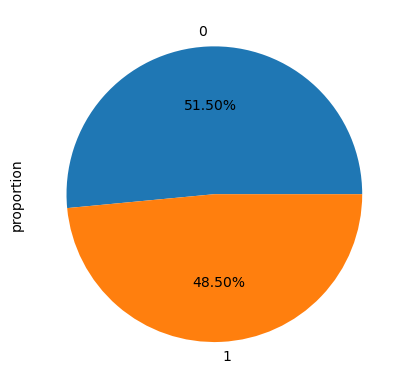

In [28]:
y.value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

**Inference:**

- Target variable is balanced so we don't have to use SMOTE or random under sampler to balance the data.


In [29]:
# Splitting the data into training and testing sets
# with test size of 20% and random state of 42 to fix the random seed so that when we run the code again we get the same result
# stratify = y is used to ensure that the proportion of each class in the target variable is the same in both training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=9)

**Inference:**

- Here we have used train test split to split the data into training and testing sets. We have used model selection module of scikit-learn library.


In [30]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (140, 8)
y_train shape: (140,)
x_test shape: (60, 8)
y_test shape: (60,)


# **Predictive Modelling**


In [31]:
# Creating a function to evaluate the model performance
mod = []
acc = []
prec = []
rec = []
f1 = []
ckap = []

def evaluate_model(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]

    print(f'Confusion Matrix : \n {confusion_matrix(ytest, pred_h)}')
    print(f'\n Classification Report : \n {classification_report(ytest, pred_h)}')

    # Plotting the ROC curve
    plt.figure(figsize=(12, 7))
    fpr,tpr,thresh = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr,label=m,color = 'purple')
    plt.plot([0, 1], [0, 1], color='r', ls='--')
    plt.title(f'ROC AUC : {roc_auc_score(ytest,pred_s):.3f}')
    plt.xlabel('False Positive Rate - FPR')
    plt.ylabel('True Positive Rate - TPR')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotting the Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(ytest, pred_s)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(12, 7))
    plt.plot(recall, precision, color='blue')
    plt.title(f'Precision-Recall AUC : {pr_auc:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Saving the model performance metrics in the lists
    ans = input('Do you want to save the result? Y/N : ')
    if ans.lower() == 'y':
        mod.append(str(model))
        acc.append(accuracy_score(ytest, pred_h))
        prec.append(precision_score(ytest, pred_h))
        rec.append(recall_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        ckap.append(cohen_kappa_score(ytest, pred_h))
        global scorecard
        scorecard = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':prec,'Recall':rec,'F1 Score':f1,'Cohen Kappa Score':ckap})
        print('\nResult saved to scorecard')
    else:
        return
    

**Defining Tuning function**


In [32]:
def tuning_parameters(grid,estimator,x,y,score = 'f1'):
    gscv = GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## **`Logistic Regression`**


Confusion Matrix : 
 [[25  6]
 [ 7 22]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        31
           1       0.79      0.76      0.77        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



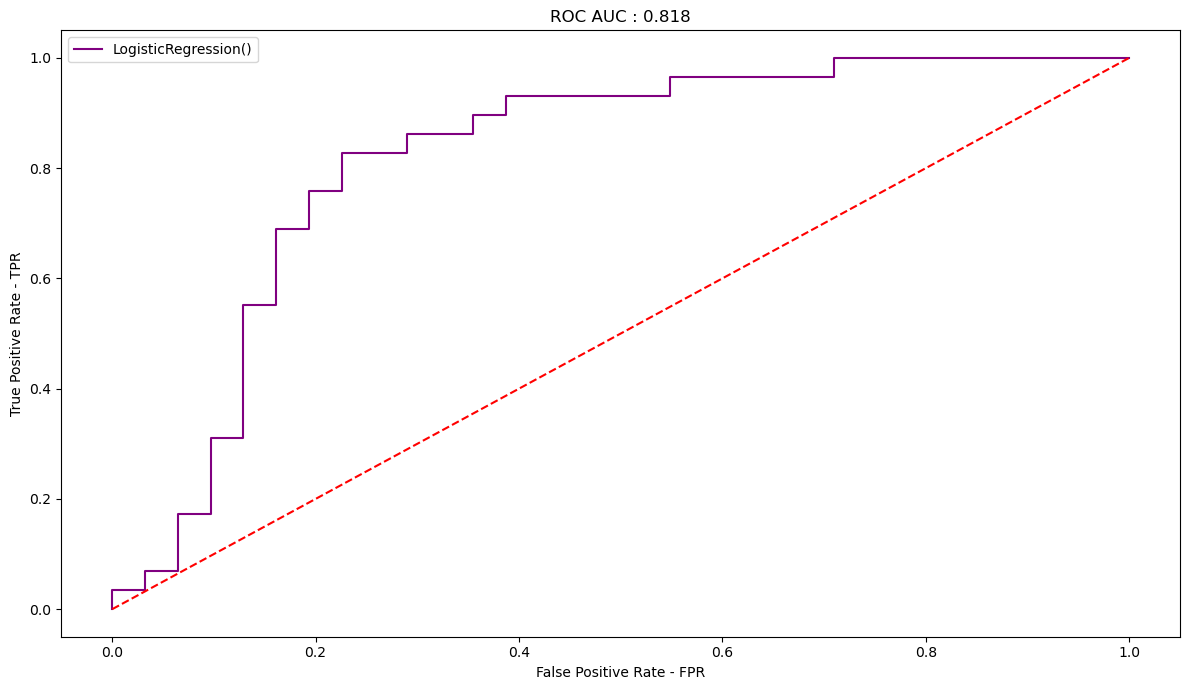

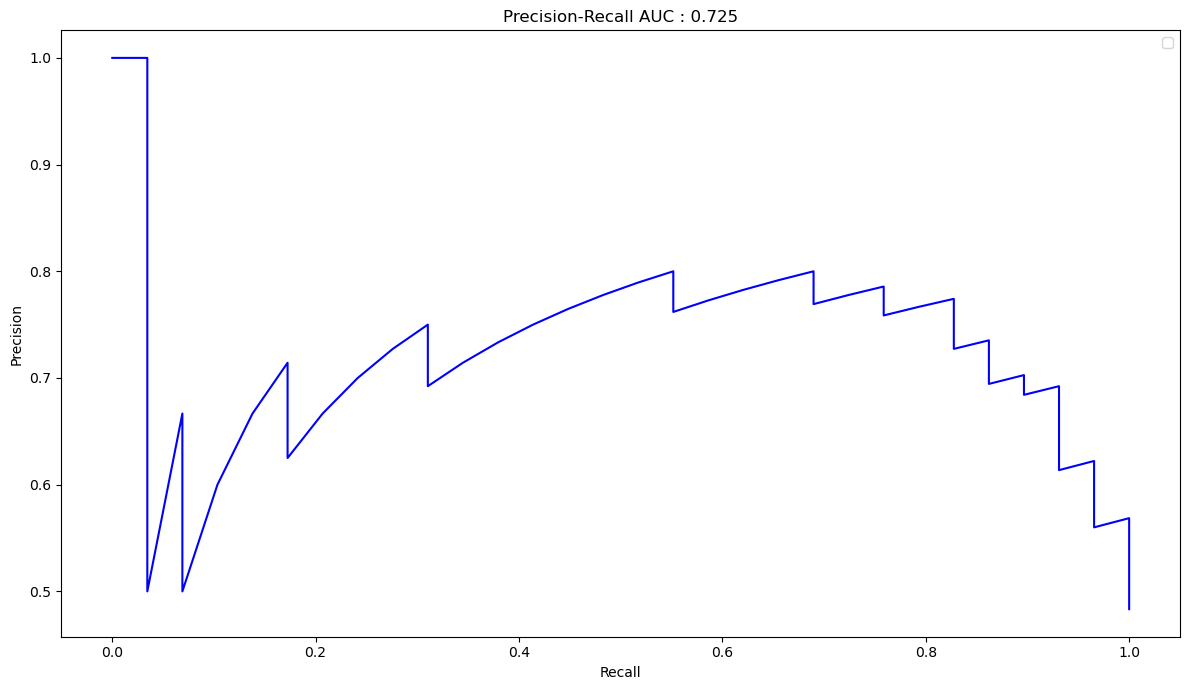


Result saved to scorecard


In [33]:
evaluate_model(LogisticRegression(),x_train,y_train,x_test,y_test)

In [34]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566


## **`Decision Tree Classifier`**


Confusion Matrix : 
 [[26  5]
 [ 6 23]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.82      0.79      0.81        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



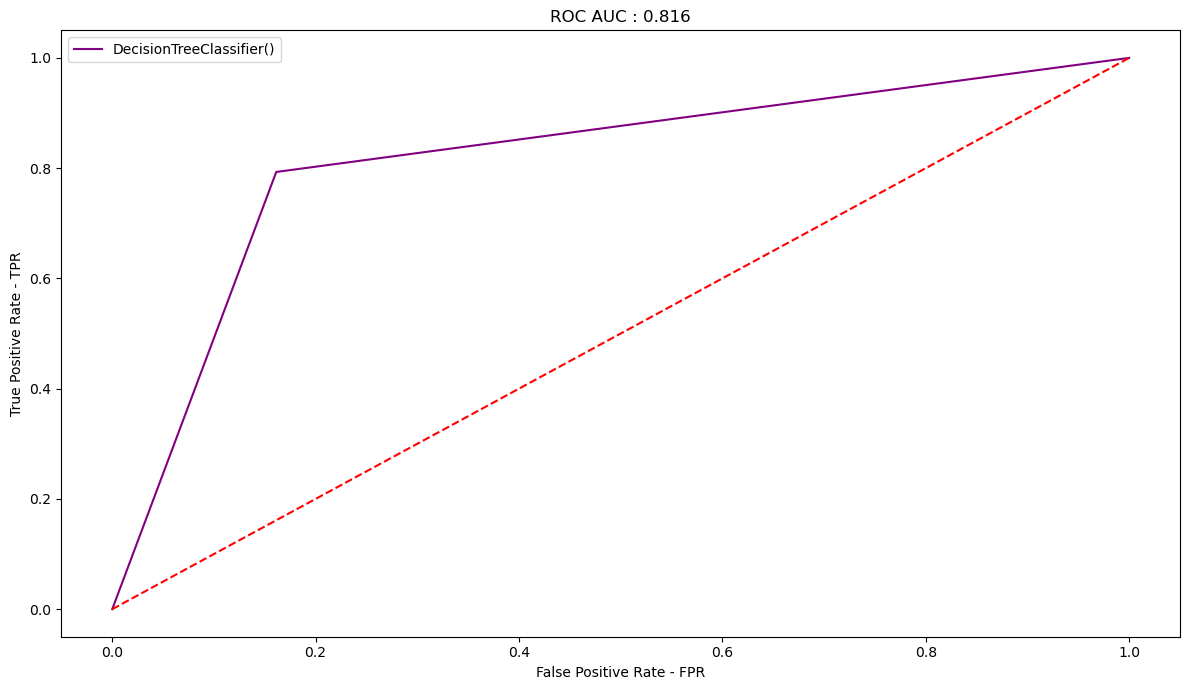

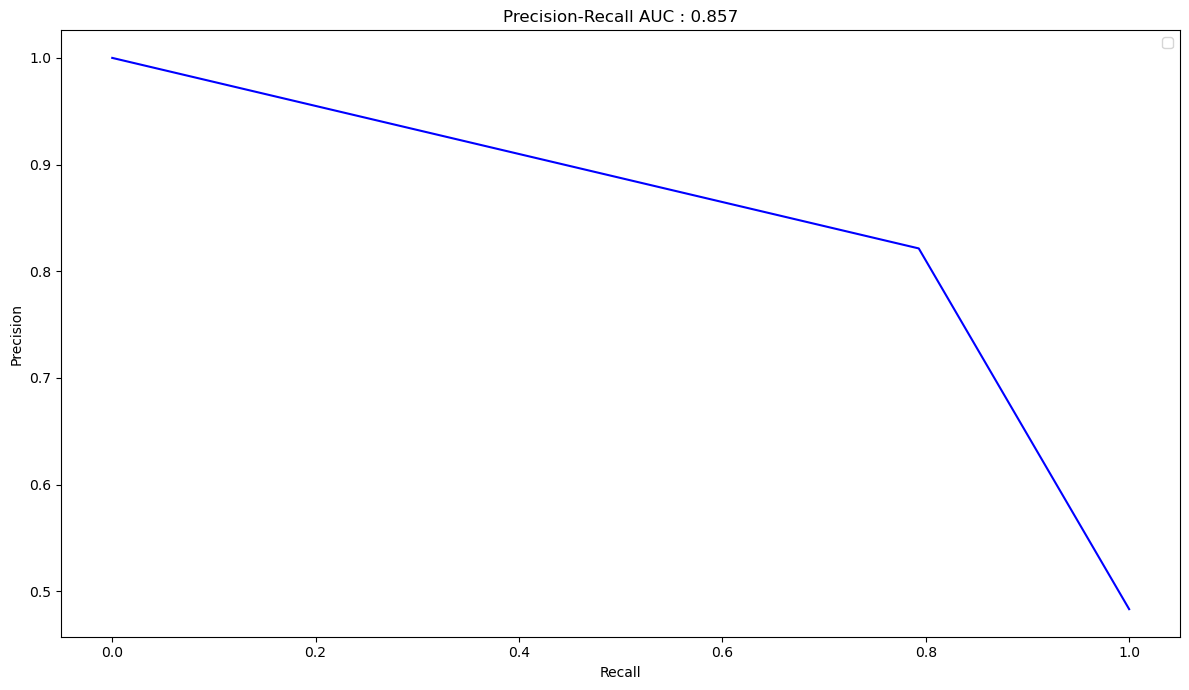


Result saved to scorecard


In [35]:
evaluate_model(DecisionTreeClassifier(),x_train,y_train,x_test,y_test)

In [36]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633


### **With Tuning using gridsearchcv**


In [37]:
best_dt = tuning_parameters({'max_depth':[2,5,6,9],'min_samples_split':[2,3,5,6,7],'max_features':[2,4,5],
                             'max_leaf_nodes':[3,4,6,8],'min_samples_leaf':[2,3,6,7]},
                             estimator = DecisionTreeClassifier(),x = x_train,y = y_train)
best_dt

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


{'max_depth': 9,
 'max_features': 5,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

Confusion Matrix : 
 [[26  5]
 [ 2 27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.84      0.93      0.89        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



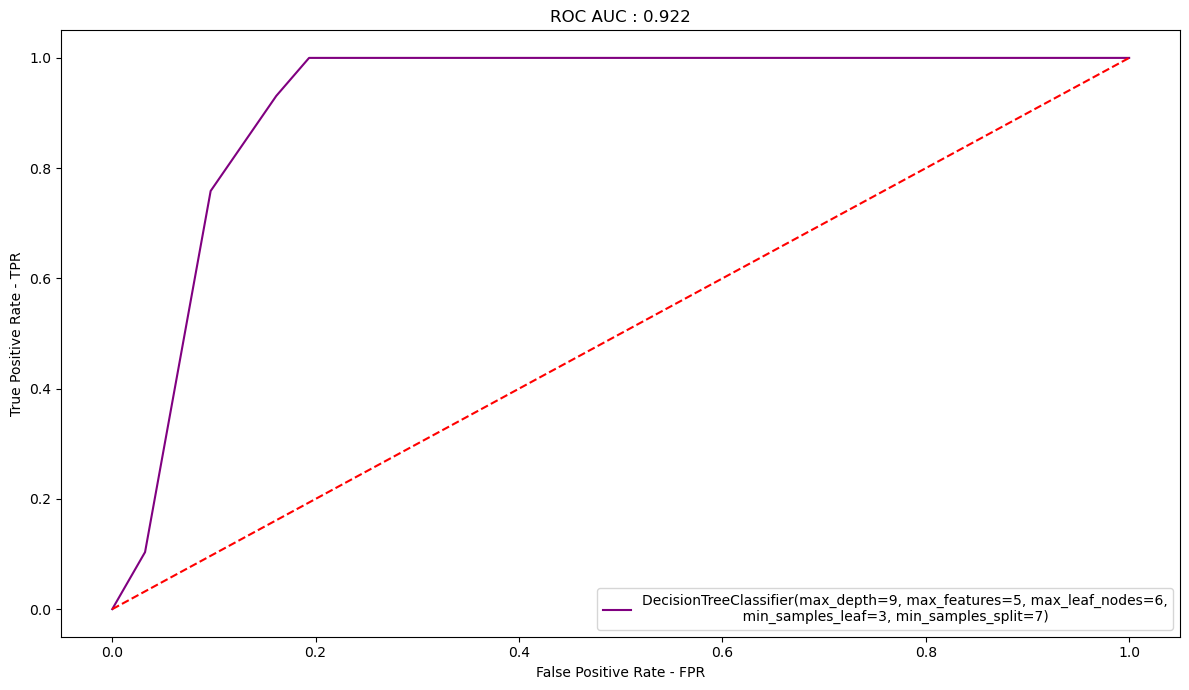

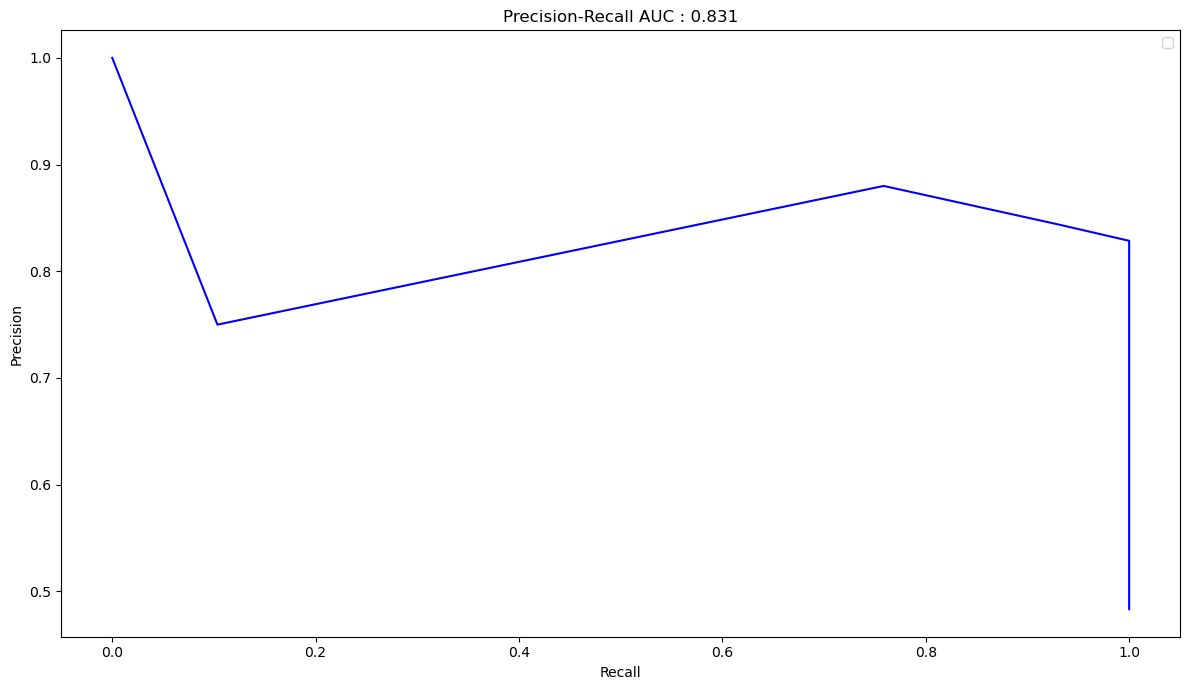


Result saved to scorecard


In [38]:
evaluate_model(DecisionTreeClassifier(**best_dt),x_train,y_train,x_test,y_test)

In [39]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767


## **`Bagging Classifier`**


Confusion Matrix : 
 [[26  5]
 [ 3 26]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



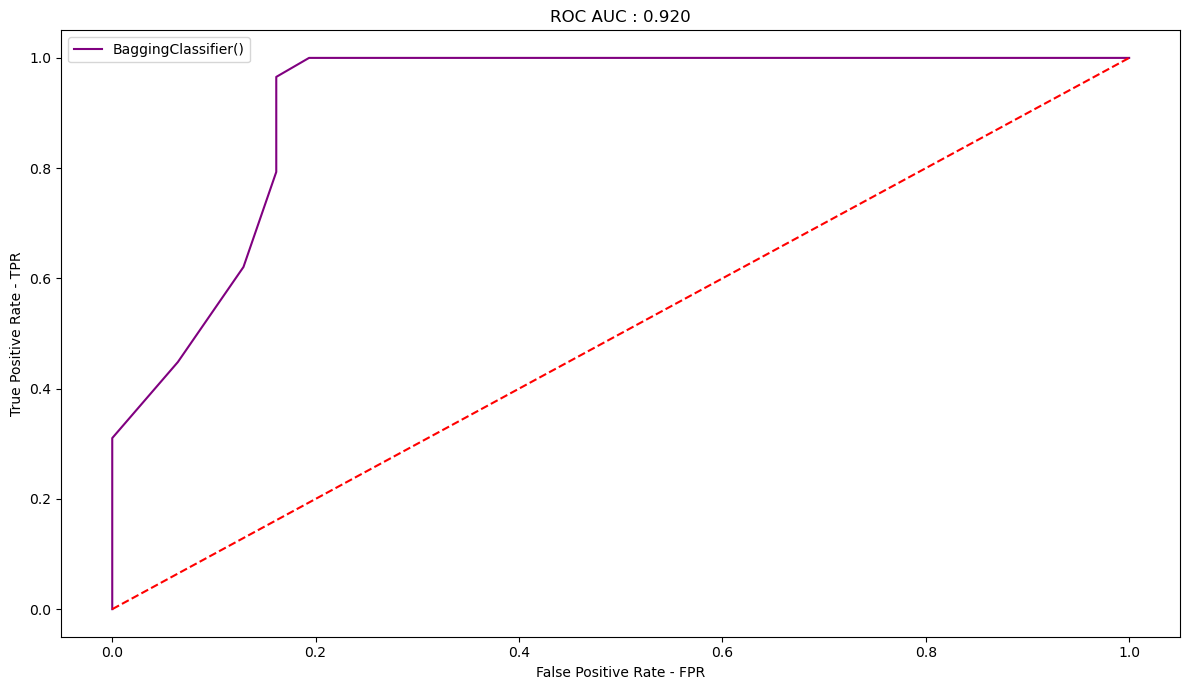

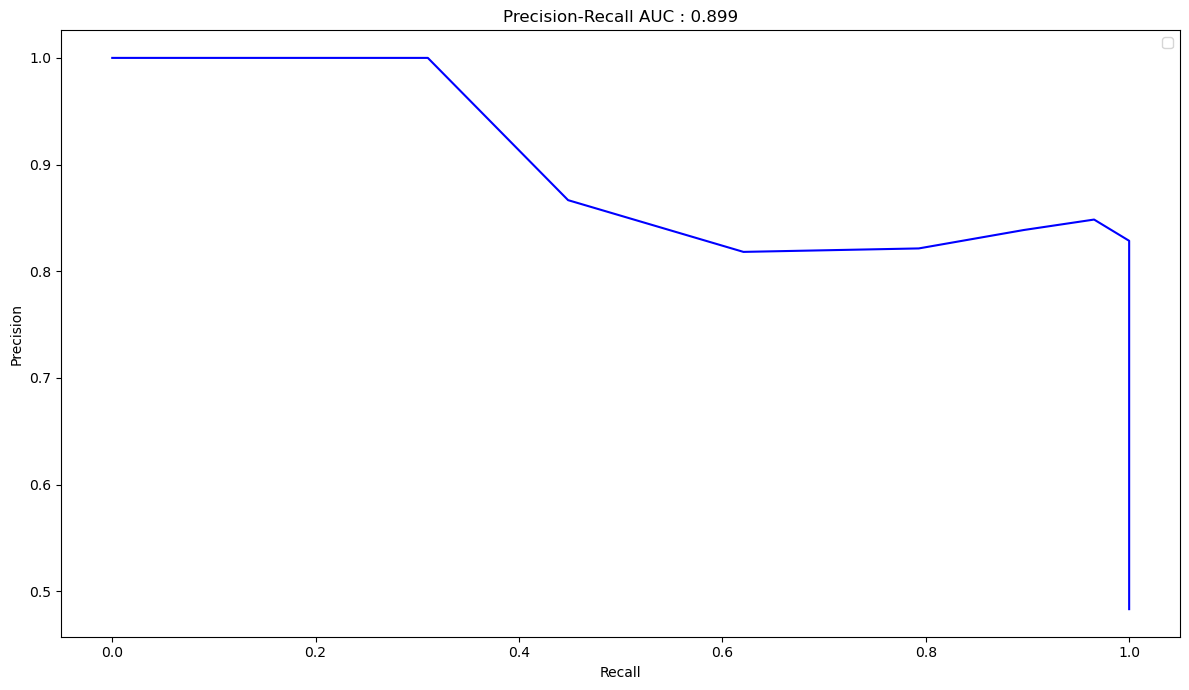


Result saved to scorecard


In [40]:
evaluate_model(BaggingClassifier(),x_train,y_train,x_test,y_test)

In [41]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734


## **With Tuning using defined function**


In [42]:
best_bg = tuning_parameters({'n_estimators':[100,130,170,200],'max_samples':[4,7,8],'max_features':[3,5,6,7]},
                             estimator=BaggingClassifier(),x=x_train,y=y_train)
best_bg

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_features': 5, 'max_samples': 4, 'n_estimators': 200}

Confusion Matrix : 
 [[24  7]
 [ 3 26]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        29

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



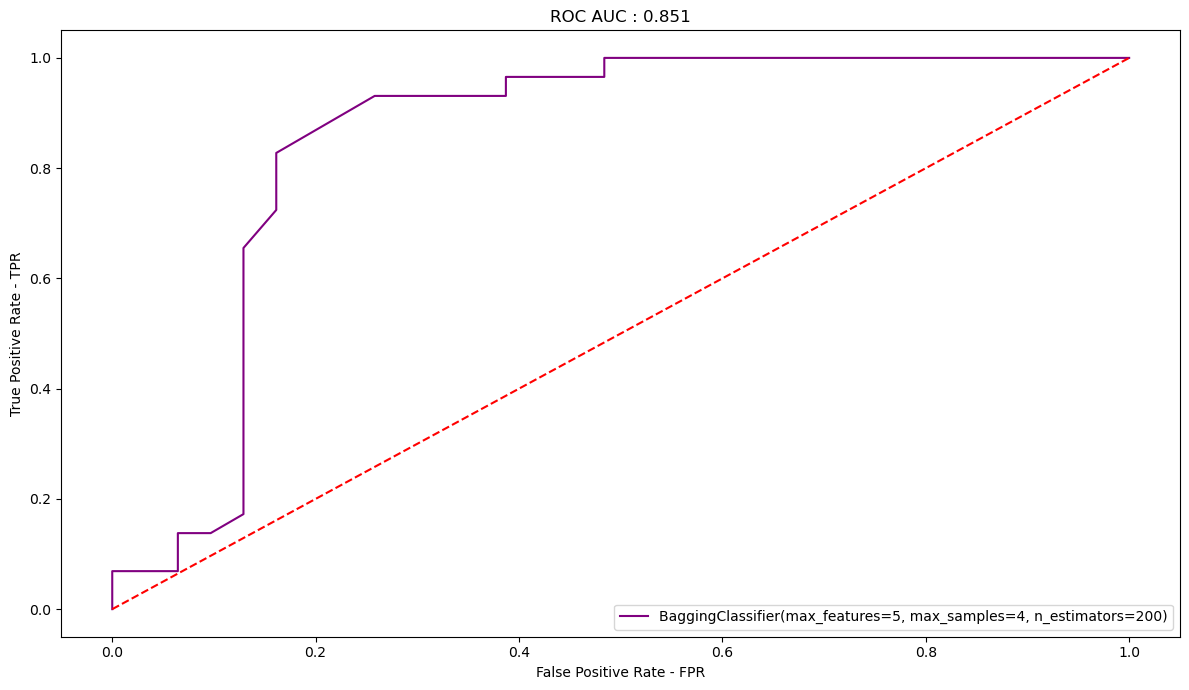

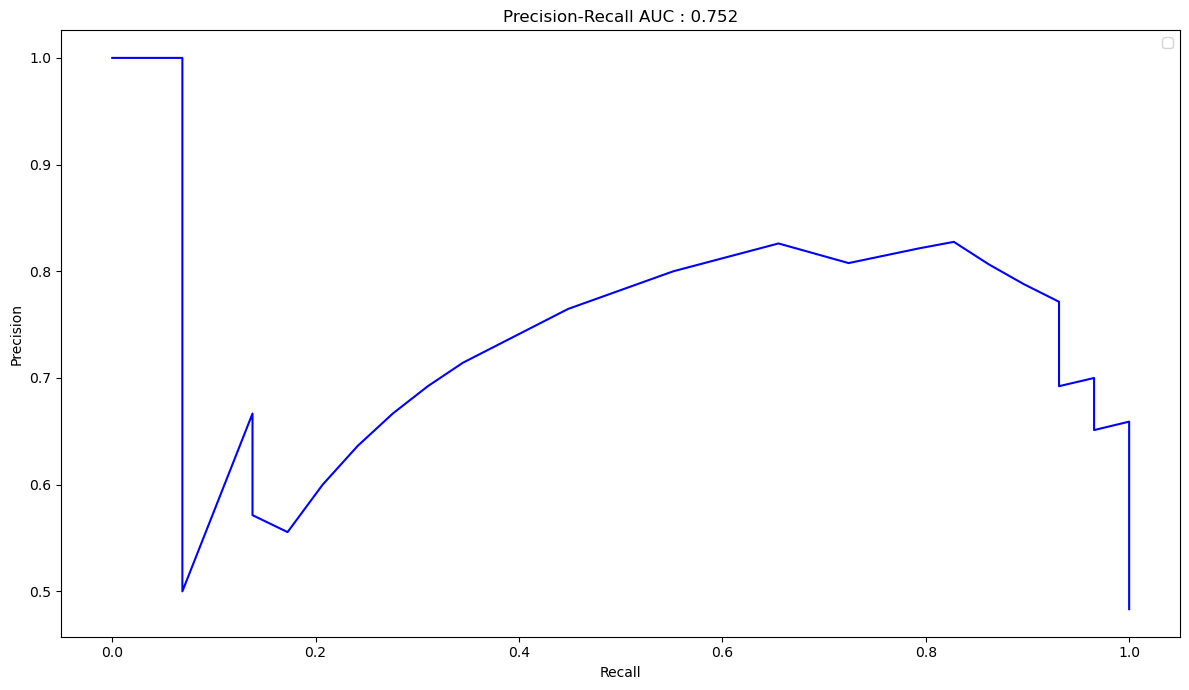


Result saved to scorecard


In [43]:
evaluate_model(BaggingClassifier(**best_bg),x_train,y_train,x_test,y_test)

In [44]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668


## **`Random Forest Classifier`**


Confusion Matrix : 
 [[26  5]
 [ 2 27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.84      0.93      0.89        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



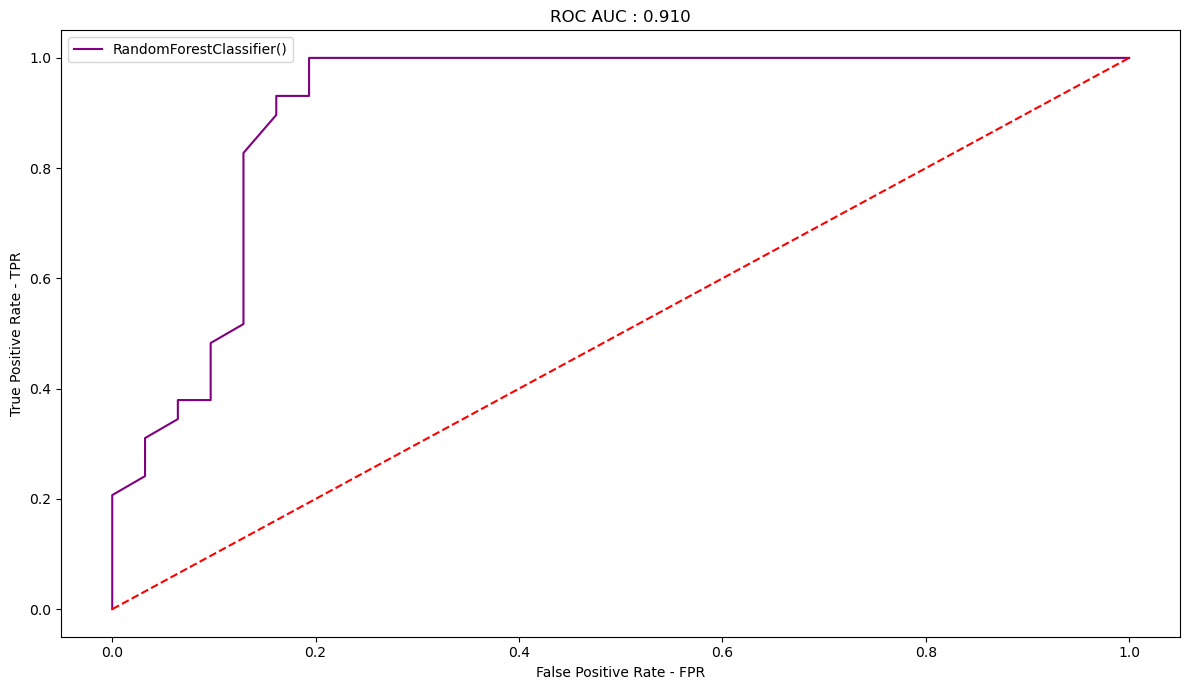

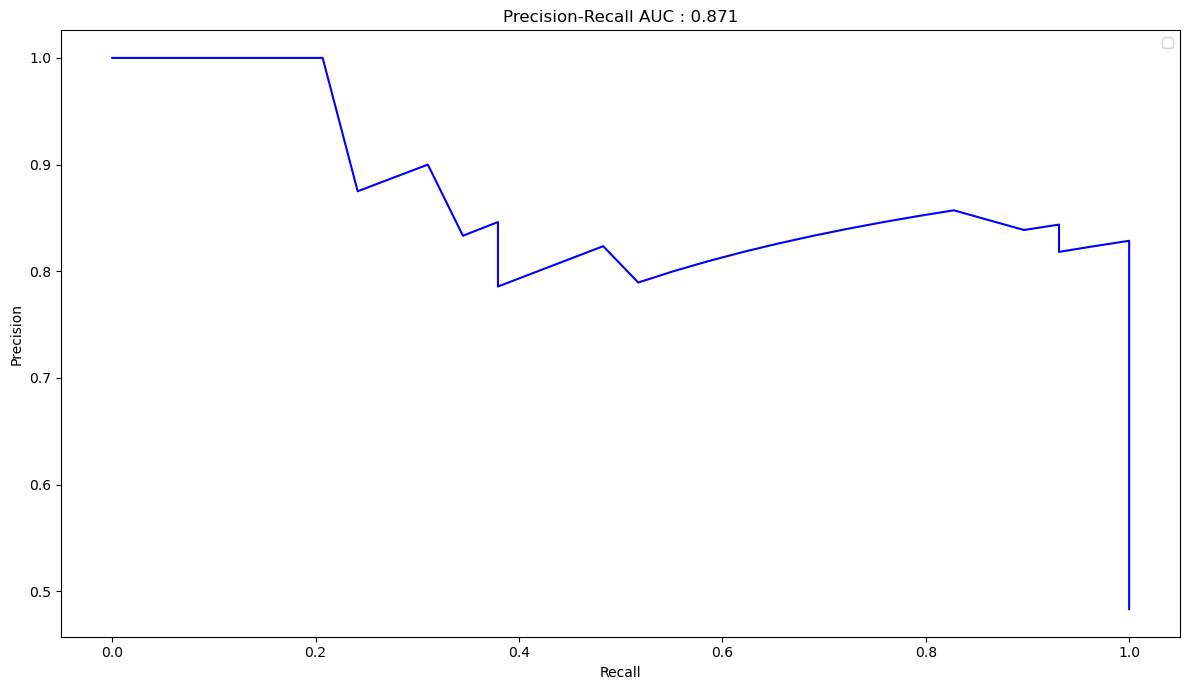


Result saved to scorecard


In [45]:
evaluate_model(RandomForestClassifier(),x_train,y_train,x_test,y_test)

In [46]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767


## **With Tuning using defined function**


In [47]:
best_rf = tuning_parameters({'n_estimators':[100,170,180],'max_features':[2,3,6],
                             'max_depth':[3,5,8]},
                             estimator=RandomForestClassifier(),x=x_train,y=y_train)
best_rf

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 3, 'max_features': 6, 'n_estimators': 180}

Confusion Matrix : 
 [[25  6]
 [ 0 29]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89        31
           1       0.83      1.00      0.91        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60



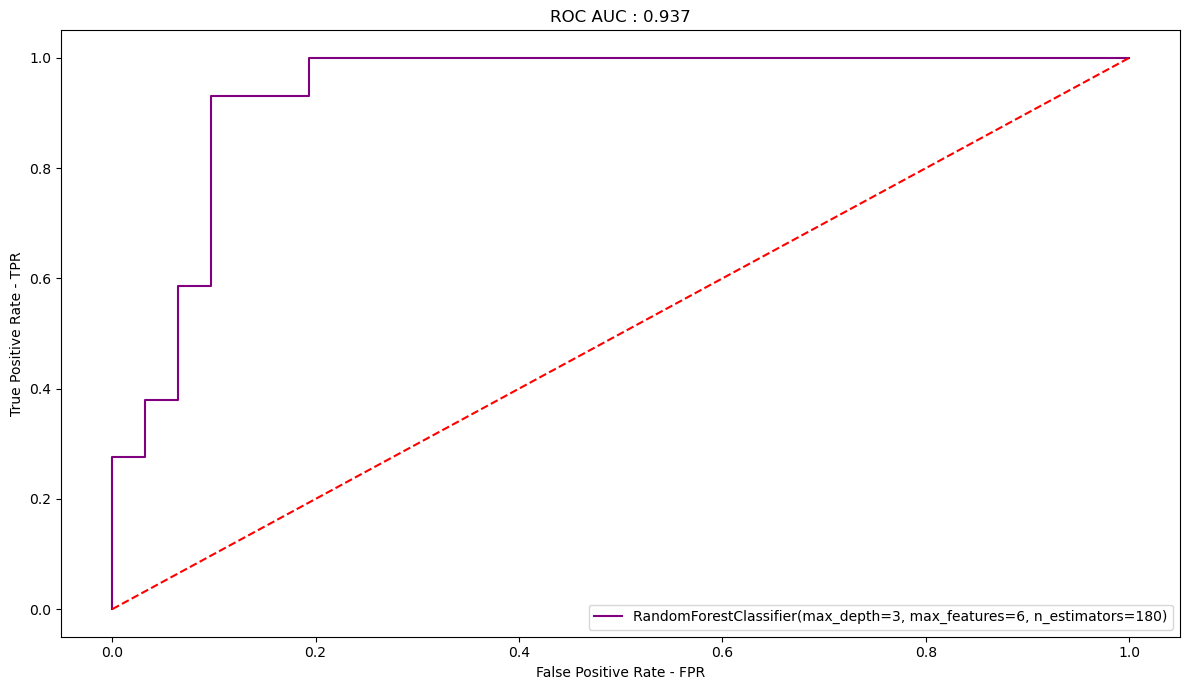

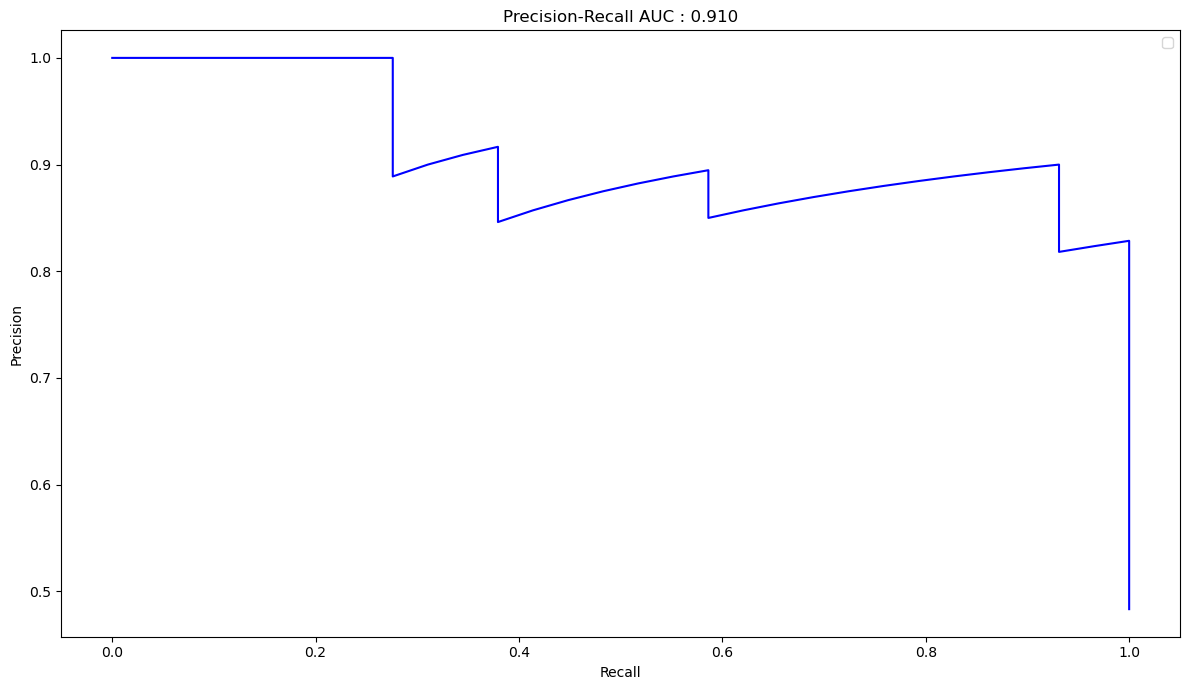


Result saved to scorecard


In [48]:
evaluate_model(RandomForestClassifier(**best_rf),x_train,y_train,x_test,y_test)

In [49]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801


## **`Ada Boost Classifier`**


Confusion Matrix : 
 [[27  4]
 [ 7 22]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.85      0.76      0.80        29

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



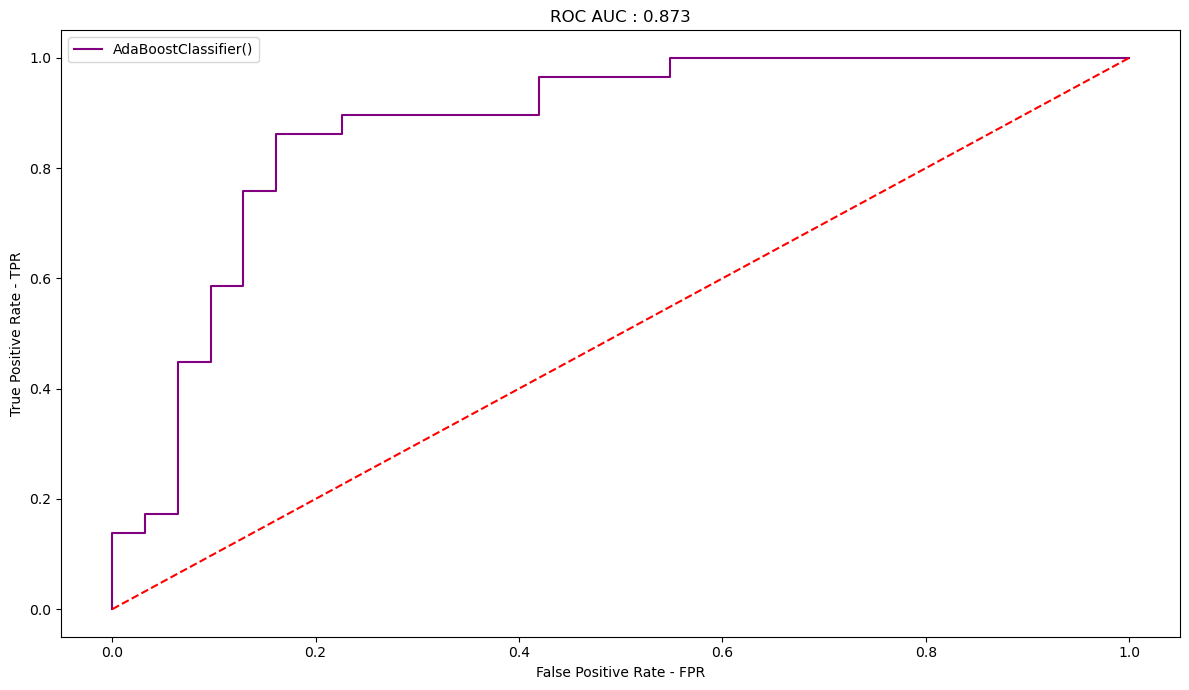

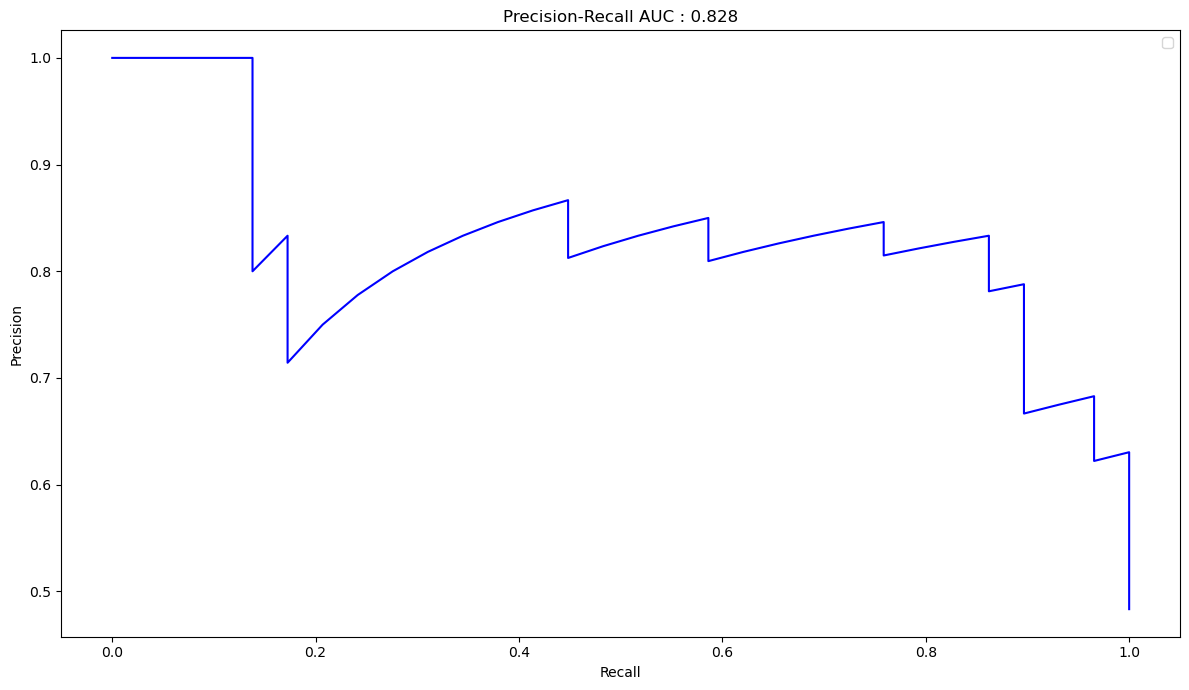


Result saved to scorecard


In [50]:
evaluate_model(AdaBoostClassifier(),x_train,y_train,x_test,y_test)

In [51]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632


## **With Tuning using defined function**


In [52]:
best_ada = tuning_parameters({'n_estimators':[110,140,170,230,250],'learning_rate':[0.2,0.3,0.4,0.7,0.8,0.9]},
                             estimator=AdaBoostClassifier(),x=x_train,y=y_train)
best_ada

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'learning_rate': 0.4, 'n_estimators': 250}

Confusion Matrix : 
 [[27  4]
 [ 6 23]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



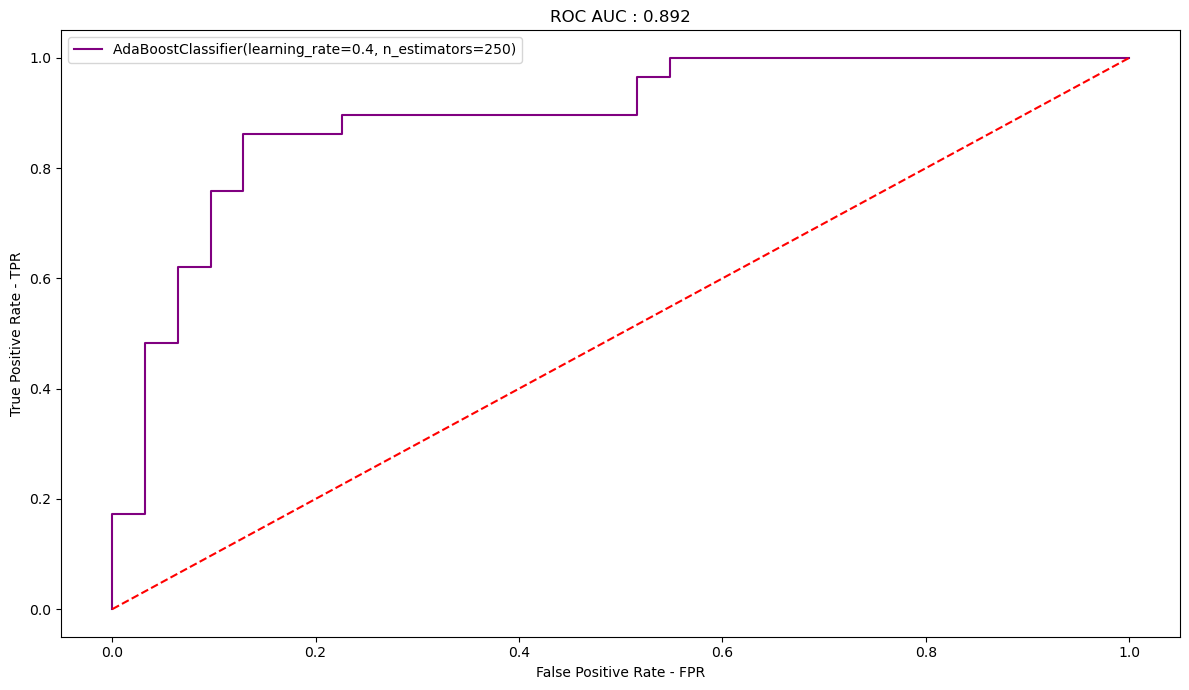

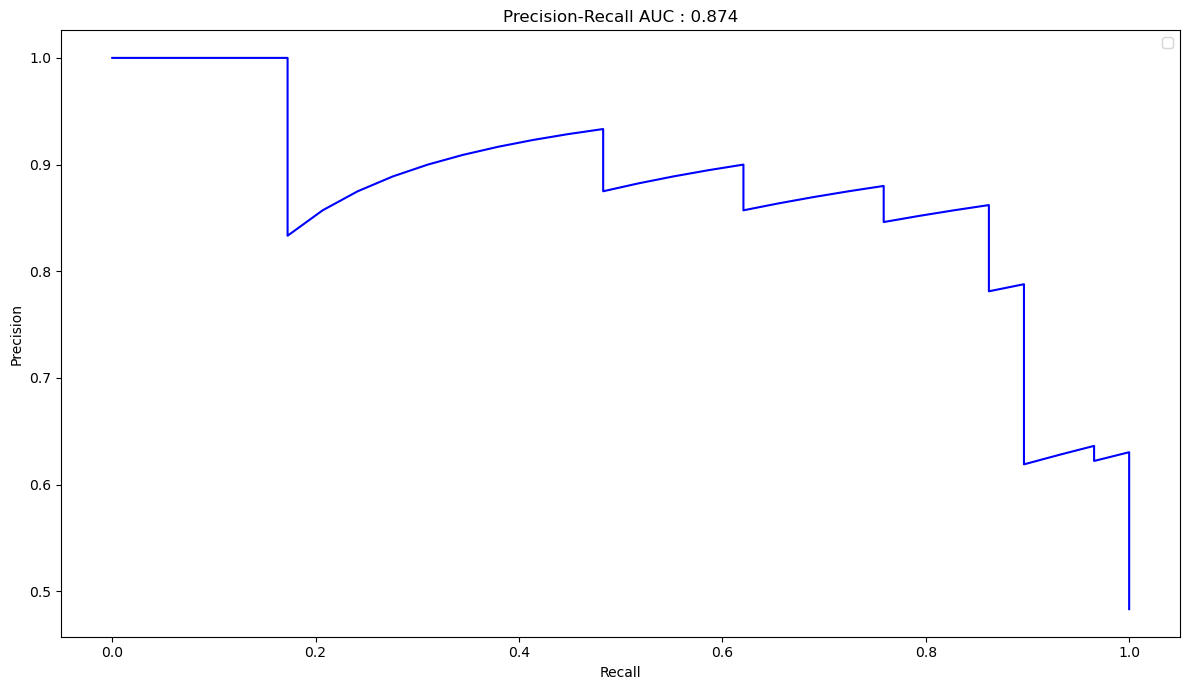


Result saved to scorecard


In [53]:
evaluate_model(AdaBoostClassifier(**best_ada),x_train,y_train,x_test,y_test)

In [54]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632
8,"AdaBoostClassifier(learning_rate=0.4, n_estima...",0.833,0.852,0.793,0.821,0.666


## **`Gradient Boost Classifier`**


Confusion Matrix : 
 [[26  5]
 [ 4 25]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.83      0.86      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



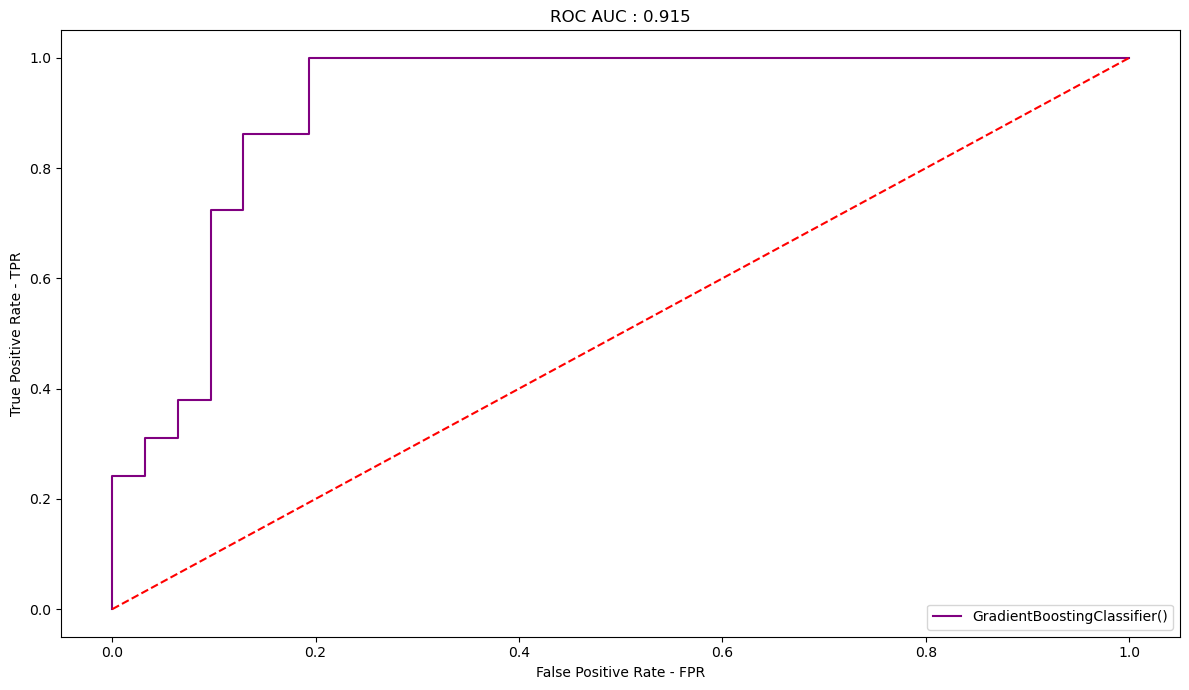

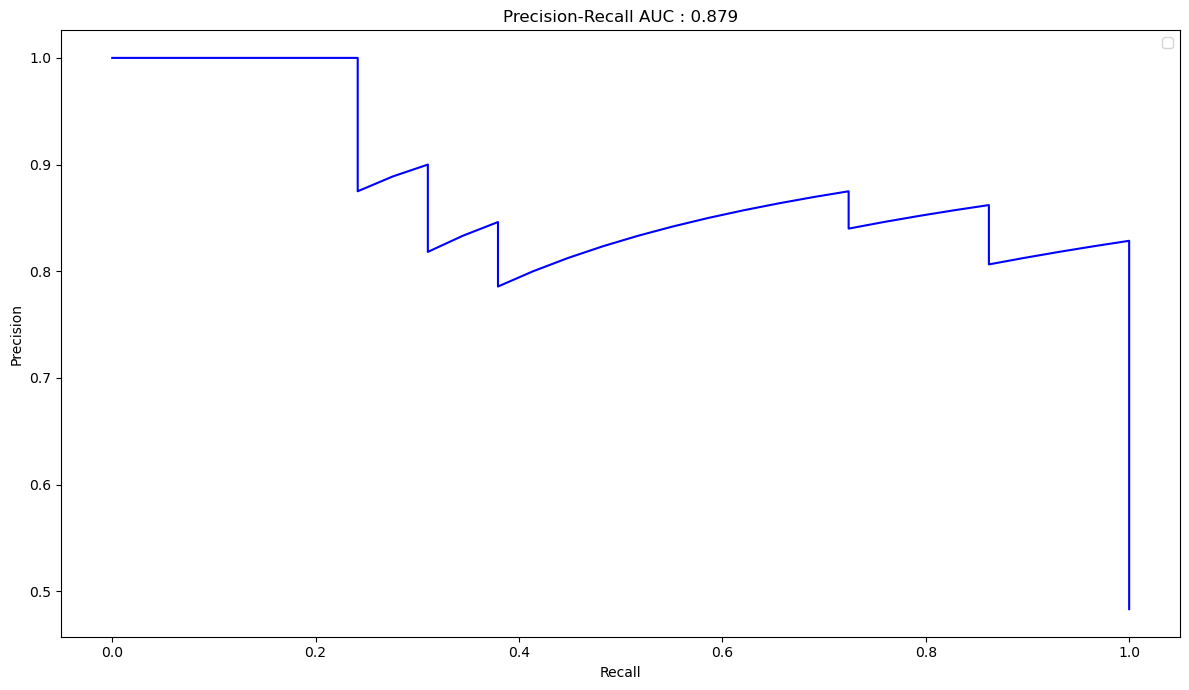


Result saved to scorecard


In [55]:
evaluate_model(GradientBoostingClassifier(),x_train,y_train,x_test,y_test)

In [56]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632
8,"AdaBoostClassifier(learning_rate=0.4, n_estima...",0.833,0.852,0.793,0.821,0.666
9,GradientBoostingClassifier(),0.850,0.833,0.862,0.847,0.700


## **`XG Boost Classifier`**


Confusion Matrix : 
 [[25  6]
 [ 3 26]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



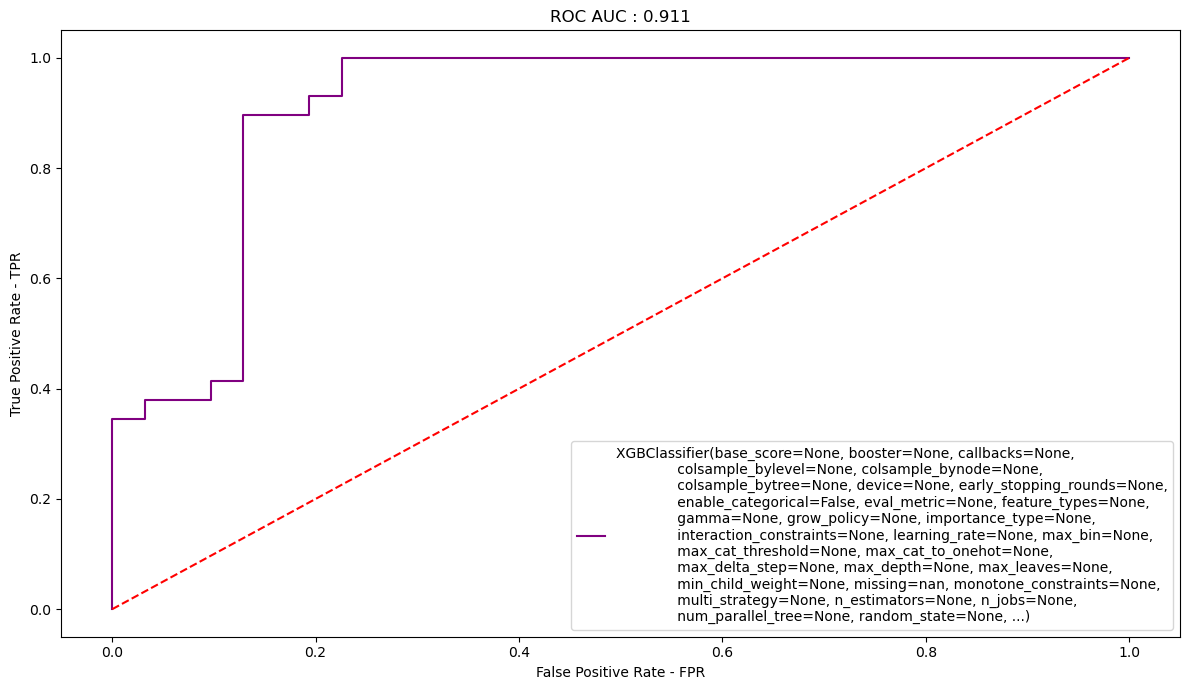

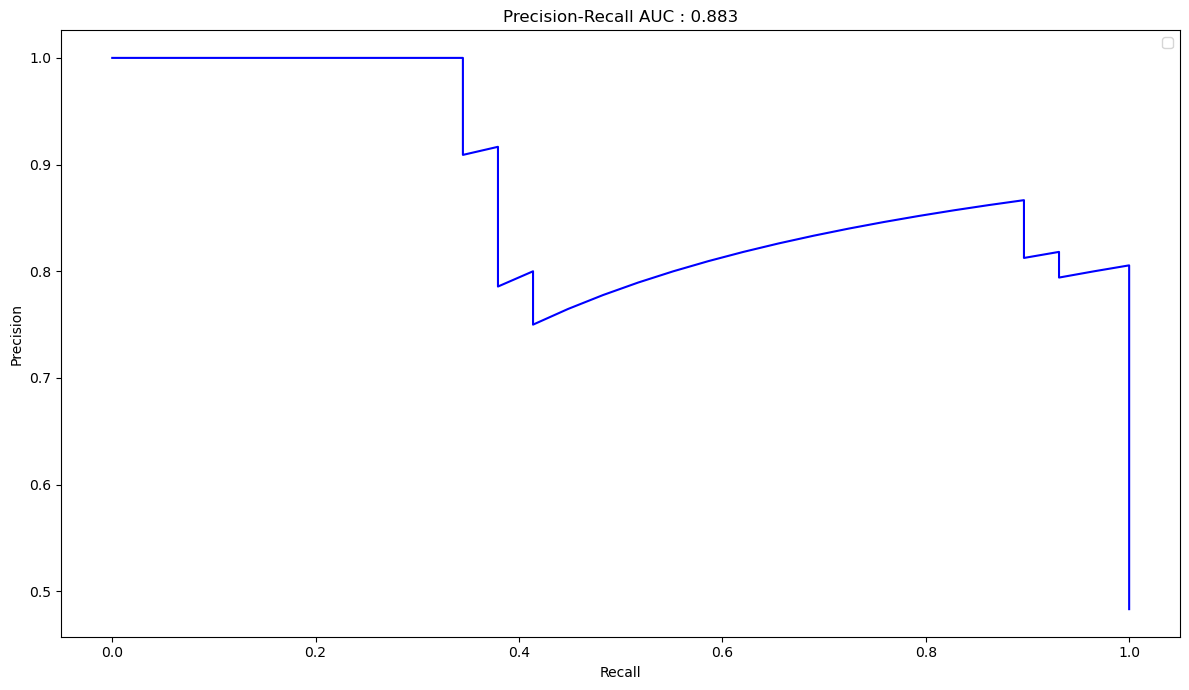


Result saved to scorecard


In [57]:
evaluate_model(XGBClassifier(),x_train,y_train,x_test,y_test)

In [58]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632
8,"AdaBoostClassifier(learning_rate=0.4, n_estima...",0.833,0.852,0.793,0.821,0.666
9,GradientBoostingClassifier(),0.850,0.833,0.862,0.847,0.700


## **With Tuning using defined function**


In [59]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
best_xg = tuning_parameters({'n_estimators':[30,40,50,80],'learning_rate':[0.05,0.07,0.2],'max_depth':[4,9],
                             'min_child_weight':[4,5],'gamma':[5,7]},estimator=XGBClassifier(),x=x_train,y=y_train)
best_xg

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'gamma': 5,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 30}

Confusion Matrix : 
 [[25  6]
 [ 0 29]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89        31
           1       0.83      1.00      0.91        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60



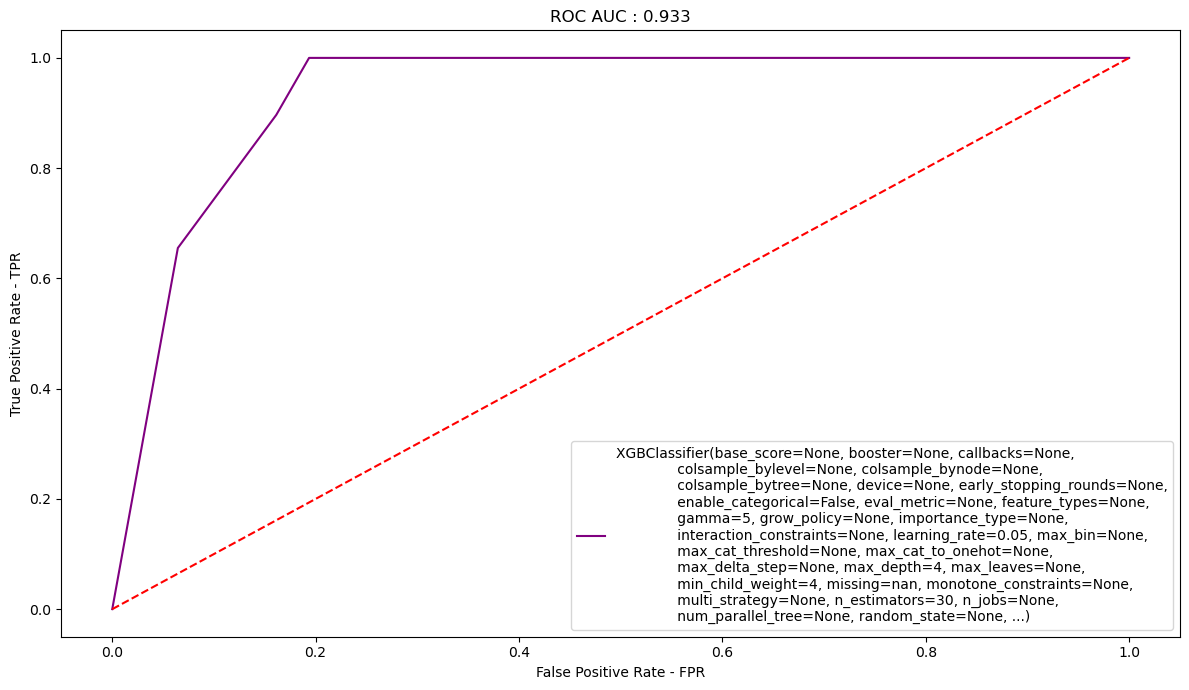

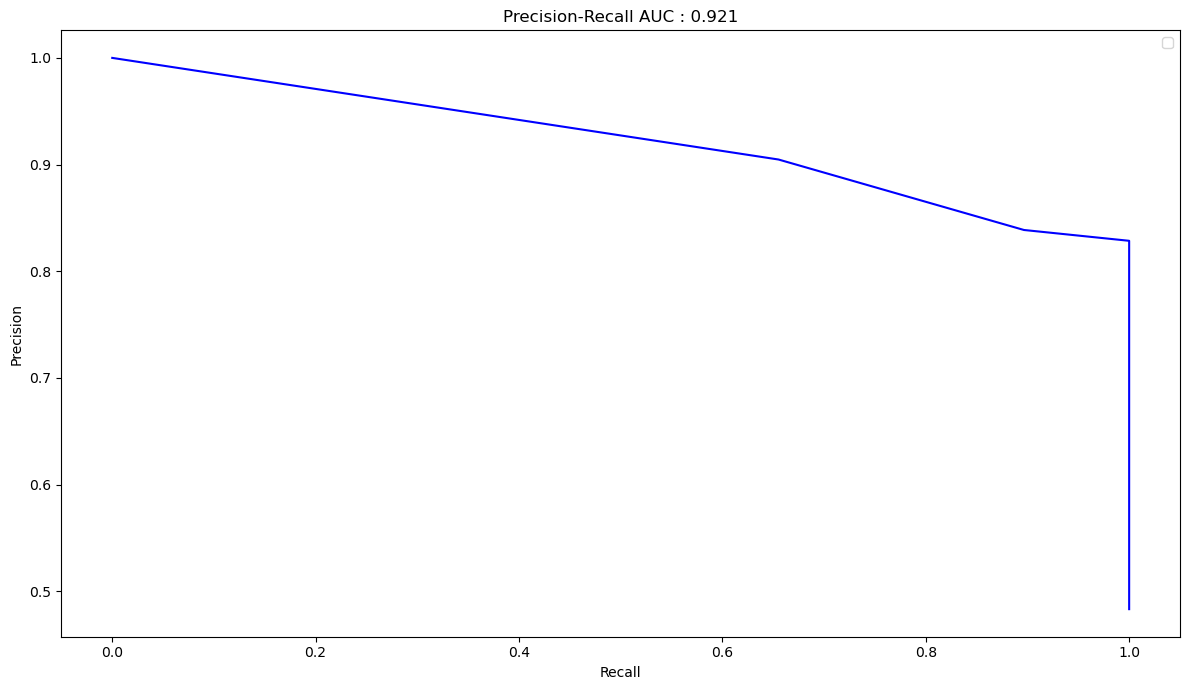


Result saved to scorecard


In [61]:
evaluate_model(XGBClassifier(**best_xg),x_train,y_train,x_test,y_test)

In [62]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632
8,"AdaBoostClassifier(learning_rate=0.4, n_estima...",0.833,0.852,0.793,0.821,0.666
9,GradientBoostingClassifier(),0.850,0.833,0.862,0.847,0.700


# **Final Model**


In [73]:
final_model = XGBClassifier(**best_ada)
final_model.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Confusion Matrix : 
 [[26  5]
 [ 3 26]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



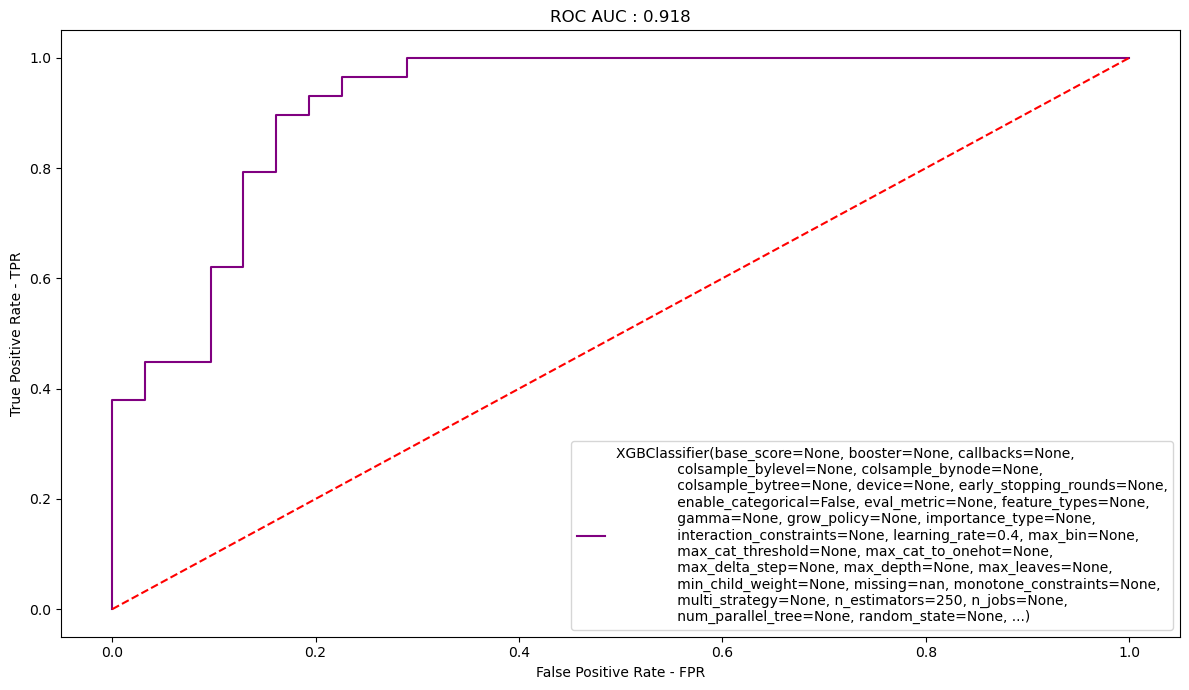

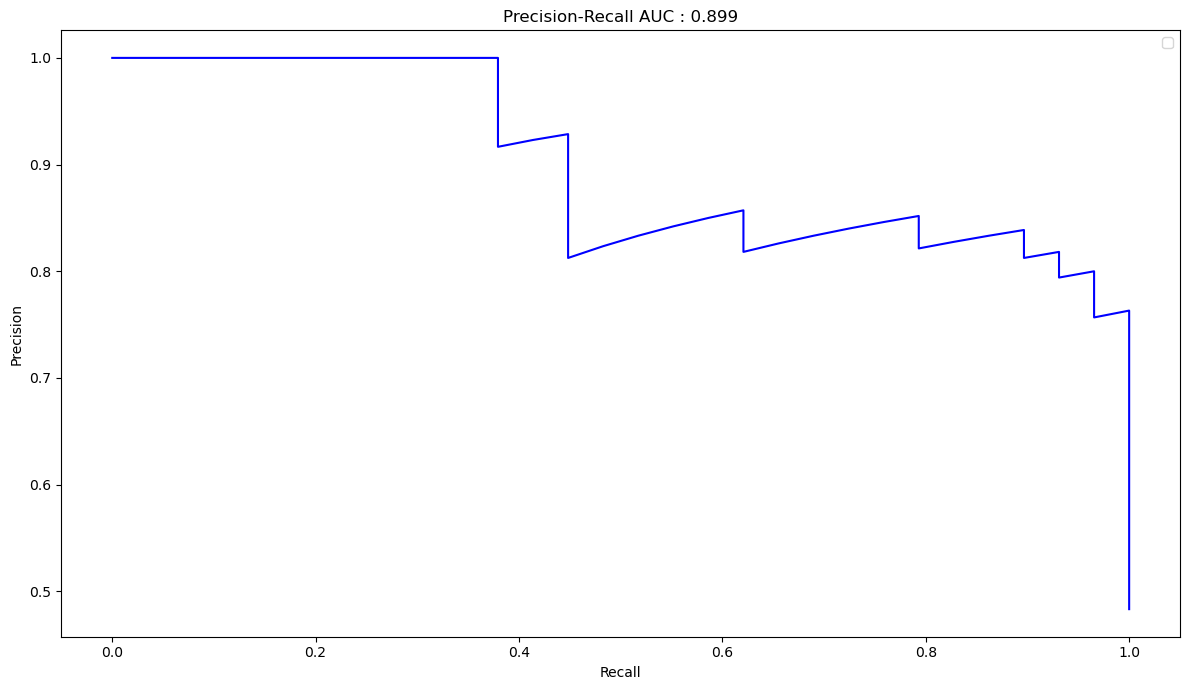


Result saved to scorecard


In [74]:
evaluate_model(final_model,x_train,y_train,x_test,y_test)

#### **Inference:** 
* For final model we have used xgboost with tuning hyperparameters of Ada boost beacuse if we use hyperparameters of xg boost than there is chance that it will overfit the model. So we have used Ada boost hyperparameters with XGB Classifier.

In [75]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,LogisticRegression(),0.783,0.786,0.759,0.772,0.566
1,DecisionTreeClassifier(),0.817,0.821,0.793,0.807,0.633
2,"DecisionTreeClassifier(max_depth=9, max_featur...",0.883,0.844,0.931,0.885,0.767
3,BaggingClassifier(),0.867,0.839,0.897,0.867,0.734
4,"BaggingClassifier(max_features=5, max_samples=...",0.833,0.788,0.897,0.839,0.668
5,RandomForestClassifier(),0.883,0.844,0.931,0.885,0.767
6,"RandomForestClassifier(max_depth=3, max_featur...",0.900,0.829,1.000,0.906,0.801
7,AdaBoostClassifier(),0.817,0.846,0.759,0.800,0.632
8,"AdaBoostClassifier(learning_rate=0.4, n_estima...",0.833,0.852,0.793,0.821,0.666
9,GradientBoostingClassifier(),0.850,0.833,0.862,0.847,0.700


# **KFold Cross Validation**


In [76]:
model = final_model
kfold_validation = KFold(n_splits=10,shuffle=True,random_state=42)
results = cross_val_score(model,x_train,y_train,cv=kfold_validation,scoring='accuracy')

# Cross validation scores
print(f'Cross Validation Scores : {results}')
print(f'Cross Validation Mean : {results.mean():.3f}')
print(f'Cross Validation Standard Deviation : {results.std():.3f}')

Cross Validation Scores : [0.85714286 0.85714286 1.         0.78571429 0.85714286 0.85714286
 0.78571429 0.71428571 0.92857143 0.85714286]
Cross Validation Mean : 0.850
Cross Validation Standard Deviation : 0.075


**Inference:**
From comparing `scores of cross validation` with the `scores of final model` we can see that model is `not overfitting`.


# **Feature Importance**


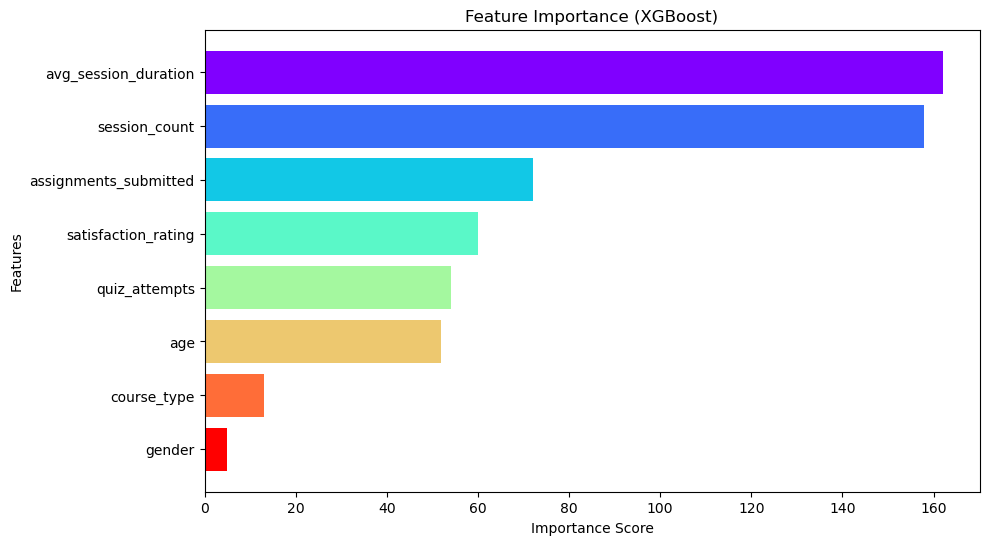

In [77]:
importance = final_model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sorted_importance]
scores = [x[1] for x in sorted_importance]

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(features)))
plt.barh(features, scores, color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis() 
plt.show()

#### **Inference:**

* As we can see the `most imortant` feature is `avg_session_duration` followed by `session_count, assignment_submitted and satisfaction_rating`.

* `Least important` feature is `gender`
